In [1]:
## Adding liberies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#
import seaborn as sns
sns.set_style('whitegrid')

# sklearn 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
df_mortgage_2017 = pd.read_csv('hmda_2017_nj_all-records_labels.csv')

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_mortgage_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349563 entries, 0 to 349562
Data columns (total 78 columns):
as_of_year                        349563 non-null int64
respondent_id                     349563 non-null object
agency_name                       349563 non-null object
agency_abbr                       349563 non-null object
agency_code                       349563 non-null int64
loan_type_name                    349563 non-null object
loan_type                         349563 non-null int64
property_type_name                349563 non-null object
property_type                     349563 non-null int64
loan_purpose_name                 349563 non-null object
loan_purpose                      349563 non-null int64
owner_occupancy_name              349563 non-null object
owner_occupancy                   349563 non-null int64
loan_amount_000s                  349409 non-null float64
preapproval_name                  349563 non-null object
preapproval                       34956

In [4]:
# Drop the columns that are represented twice 
df= df_mortgage_2017.drop(['loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval',
                           'action_taken', 'state_name', 'state_abbr', 'state_code', 'applicant_ethnicity',
                           'co_applicant_ethnicity', 'applicant_race_1', 'applicant_race_2', 'applicant_race_3',
                           'applicant_race_4', 'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
                           'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5', 'applicant_sex',
                           'co_applicant_sex', 'purchaser_type', 'hoepa_status', 'lien_status', 'edit_status',
                           'edit_status_name', 'sequence_number', 'application_date_indicator',
                           'denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'as_of_year', 
                           'respondent_id', 'agency_abbr', 'agency_code','county_code', 'msamd', 
                           'census_tract_number','action_taken_name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349563 entries, 0 to 349562
Data columns (total 37 columns):
agency_name                       349563 non-null object
loan_type_name                    349563 non-null object
property_type_name                349563 non-null object
loan_purpose_name                 349563 non-null object
owner_occupancy_name              349563 non-null object
loan_amount_000s                  349409 non-null float64
preapproval_name                  349563 non-null object
msamd_name                        348723 non-null object
county_name                       348887 non-null object
applicant_ethnicity_name          349563 non-null object
co_applicant_ethnicity_name       349563 non-null object
applicant_race_name_1             349563 non-null object
applicant_race_name_2             1756 non-null object
applicant_race_name_3             143 non-null object
applicant_race_name_4             30 non-null object
applicant_race_name_5             18 non-n

For this analysis, I will focus on solely loan purposes that are for home purchase. 

In [5]:
# Find loan_purpose_name that is Home purchase
df_hp = df.loc[df.loan_purpose_name == 'Home purchase']
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184956 entries, 0 to 349562
Data columns (total 37 columns):
agency_name                       184956 non-null object
loan_type_name                    184956 non-null object
property_type_name                184956 non-null object
loan_purpose_name                 184956 non-null object
owner_occupancy_name              184956 non-null object
loan_amount_000s                  184928 non-null float64
preapproval_name                  184956 non-null object
msamd_name                        184332 non-null object
county_name                       184373 non-null object
applicant_ethnicity_name          184956 non-null object
co_applicant_ethnicity_name       184956 non-null object
applicant_race_name_1             184956 non-null object
applicant_race_name_2             776 non-null object
applicant_race_name_3             50 non-null object
applicant_race_name_4             5 non-null object
applicant_race_name_5             3 non-null 

#### Description of numerical features

loan_amount_000s
rate_spread
hud_median_family_income
tract_to_msamd_income
population
minority_population

In [6]:
df_hp.describe()

,loan_amount_000s,applicant_income_000s,rate_spread,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
count,184928.000000,158650.000000,6992.000000,184365.000000,184365.000000,184365.000000,184365.000000,184365.000000,184365.000000
mean,324.523647,143.873974,2.000852,5165.862496,34.966070,83801.391804,124.304496,1354.467833,1778.851550
std,1020.147273,266.556635,0.701360,2042.252291,26.168534,12271.342184,48.582313,687.653006,850.189064
min,1.000000,1.000000,1.500000,0.000000,0.000000,54200.000000,0.000000,0.000000,0.000000
25%,176.000000,69.000000,1.620000,3725.000000,14.390000,73700.000000,92.870003,849.000000,1232.000000
50%,261.000000,103.000000,1.780000,4944.000000,26.559999,73700.000000,118.139999,1283.000000,1670.000000
75%,377.000000,161.000000,2.070000,6343.000000,50.470001,99800.000000,151.070007,1783.000000,2185.000000
max,260000.000000,54874.000000,10.430000,16295.000000,100.000000,99800.000000,346.989990,4968.000000,6522.000000


### Description of categorical features 

applicant_sex
loan_type_name
owner_occupancy_name 
preapproval_name
agency_name
action_taken_name
denial_reason_name_1

# Exploratory Data Analysis

### Does applicants gross income affect an applicants ability in being approved for a loan

In [154]:
# The column denial was featured engineered and can the code be found on the feature engineering section
# approval and denial: mean & median
approval_mean=df_hp.loc[df_hp['denial'] == 0].applicant_income_000s.mean()
approval_median=df_hp.loc[df_hp['denial'] == 0].applicant_income_000s.median()

denial_mean=df_hp.loc[df_hp['denial'] == 1].applicant_income_000s.mean()
denial_median=df_hp.loc[df_hp['denial'] == 1].applicant_income_000s.median()

# print results
print('Approved overall applicants gross income mean {} and median {}'.format(approval_mean, approval_median))
print('Denied overall applicants gross income mean {} and median {}'.format(denial_mean, denial_median))

Approved overall applicants gross income mean 144.7191150394564 and median 104.0
Denied overall applicants gross income mean 132.40901579140655 and median 88.0


Text(0.5, 1.0, 'Overall Applicants Gross Income in thousands | Approval % Denial')

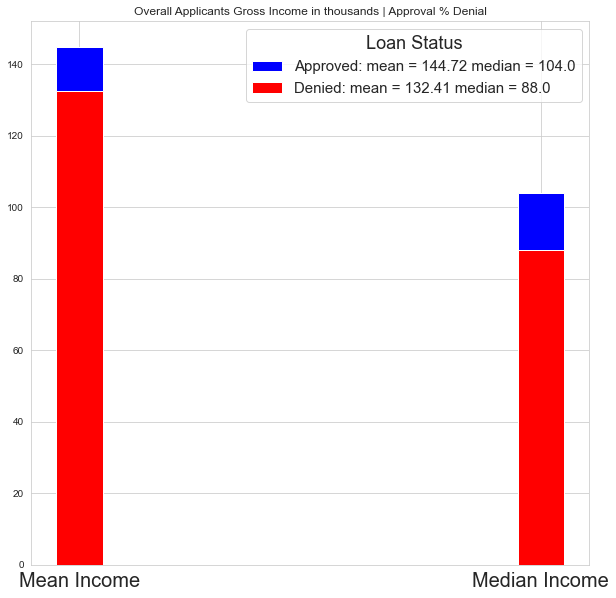

In [159]:
fig, ax = plt.subplots(sharey=True,figsize=(10,10))
ax.bar(x=['Mean Income', 'Median Income'], height=(approval_mean, approval_median), color='b', alpha=1, width=0.1)
ax.bar(x=['Mean Income', 'Median Income'], height=(denial_mean, denial_median), color='r', width=0.1)

plt.legend(['Approved: mean = {} median = {}'.format(np.round(approval_mean, 2),approval_median),
            'Denied: mean = {} median = {}'.format(np.round(denial_mean, 2),denial_median)],
            fontsize=15, title='Loan Status', title_fontsize=18)
ax.tick_params(axis='x', labelsize=20)
plt.title('Overall Applicants Gross Income in thousands | Approval % Denial')

### Do liens affect the ability to be approved for a loan

### What county is has the highest approval rate 

Text(0.5, 1.0, 'NJ Counties Mortgage Loan application submissions: 2017')

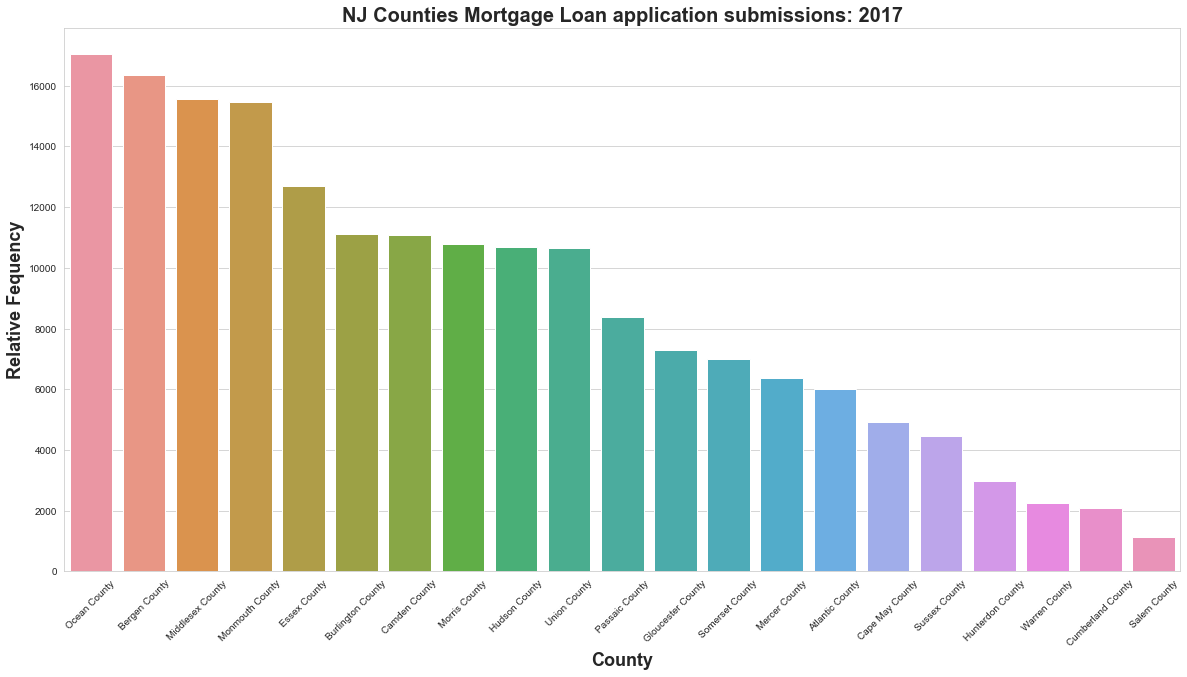

In [303]:
# Highest number of Loan Applicants: Top 10
fig, ax0 = plt.subplots(figsize = (20,10))
ax0 = sns.barplot(x=df_hp.county_name.value_counts().index,
                 y=df_hp.county_name.value_counts())
ax0.set_ylabel('Application Submissions', fontsize=18, weight='semibold')
ax0.set_xlabel('County', fontsize=18, weight='semibold')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)
ax0.set_title('NJ Counties Mortgage Loan application submissions: 2017', fontsize=20, weight='bold')

In [185]:
# Create df for the loans aprroved for county_name
df_county_name = pd.crosstab(df_hp['county_name'], df_hp['denial'], normalize='index')

In [326]:
##### Used this code to streamline the analysis of Loan approval rates based on the feature input
def rate_barplot(column_name,label1=None,title=None,x_label=None,y_label=None, ylim=None, width=None):
    """This return a barplot with a well labelled axis"""
    # Create df for the loans aprroved for column_name
    df = pd.crosstab(column_name, df_hp['denial'], normalize='index')

    #getting the x values from the length of the dataframe
    x = np.arange(df.shape[0])
    
    #index of the df as a label
    labels = list(df.index)
    fig  = plt.figure(figsize=(15,12))
    ax = fig.add_axes([0,0,1,1])

    width = width

    ret1 = ax.bar(x+ width/100,df[1],width=width,label=label1)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_ylim([0,ylim])
    ax.set_title(title,fontsize=30,fontweight='bold')
    ax.set_ylabel(y_label,fontsize=20, fontstyle='italic')
    ax.set_xlabel(x_label,fontsize=20, fontstyle='italic')

    ax.grid(True,which='minor',axis='y')

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(np.round(height*100,2)),
                        xy=(rect.get_x() + rect.get_width() / 2, 1.05*height),
                        xytext=(0, 6),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=15)

    autolabel(ret1)
    plt.setp(ax.get_xticklabels(),rotation=45,ha='right');
    plt.show()

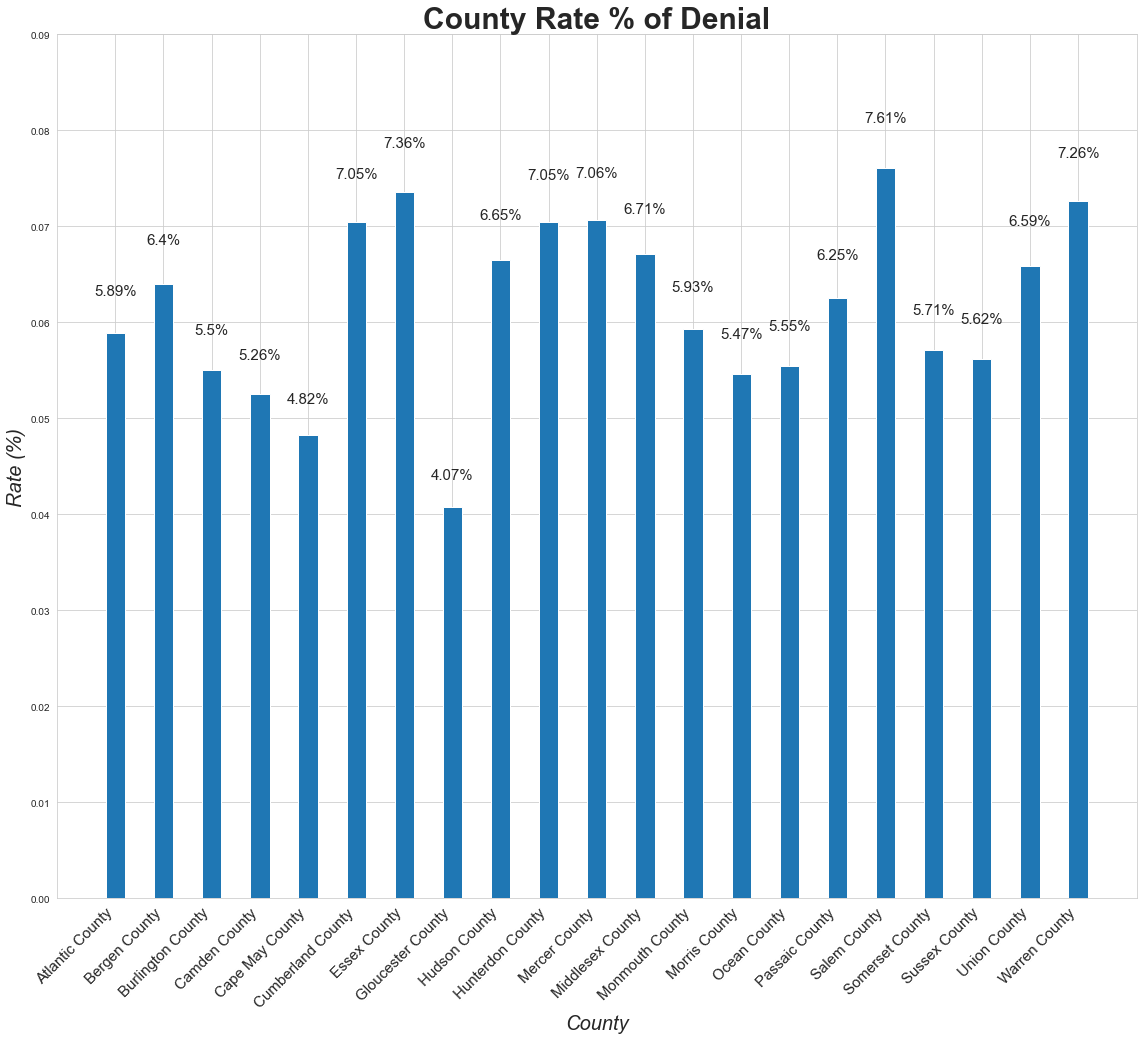

In [327]:
rate_barplot(df_hp['county_name'], 'Denial', 'County Rate % of Denial', 'County', 'Rate (%)', 0.09, 0.40)

### Does it matter what agency you choose to apply for a loan.

Text(0.5, 1.0, 'Agency Mortgage Loan application submissions: 2017')

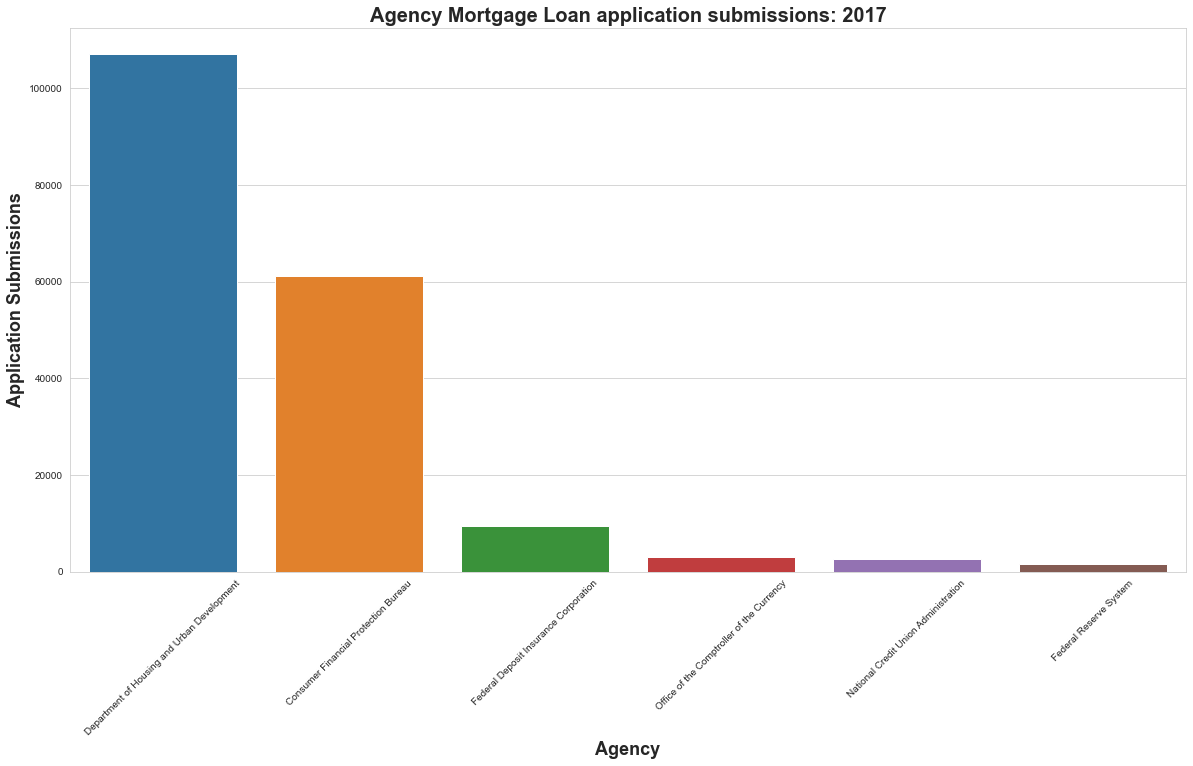

In [332]:
# Highest number of agency names Applicants: Top 10
fig, ax0 = plt.subplots(figsize = (20,10))
ax0 = sns.barplot(x=df_hp.agency_name.value_counts().index,
                 y=df_hp.agency_name.value_counts())
ax0.set_ylabel('Application Submissions', fontsize=18, weight='semibold')
ax0.set_xlabel('Agency', fontsize=18, weight='semibold')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)
ax0.set_title('Agency Mortgage Loan application submissions: 2017', fontsize=20, weight='bold')

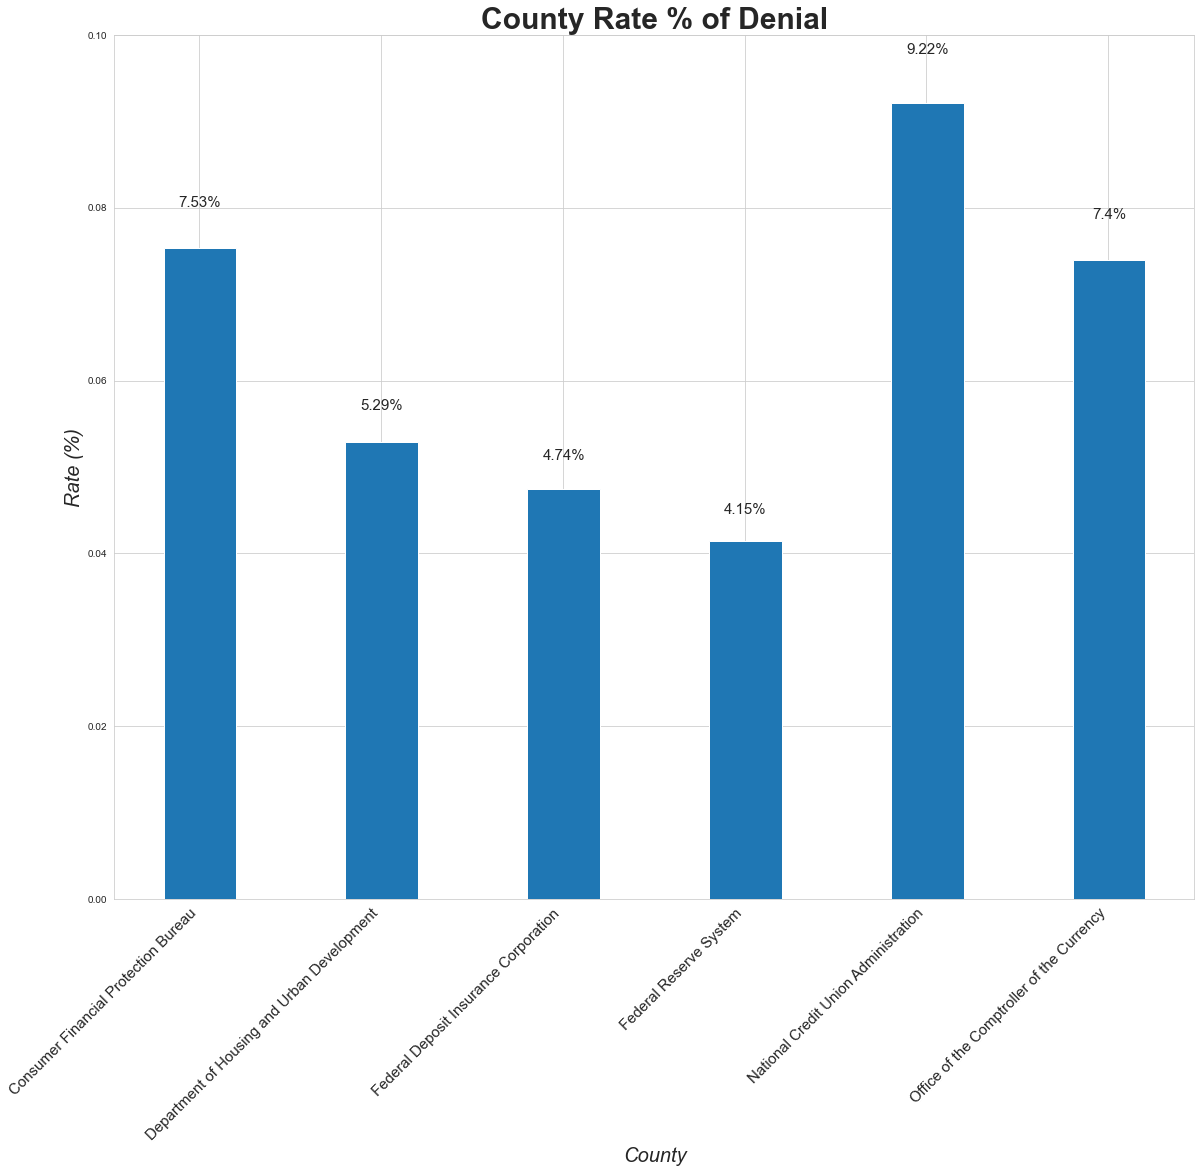

In [330]:
rate_barplot(df_hp['agency_name'], 'Denial', 'County Rate % of Denial', 'County', 'Rate (%)', 0.1, 0.40)

### Does the purchaser type affect the ability to get approved for a loan.

In [586]:
# Highest number of agency names Applicants: Top 10
fig, ax0 = plt.subplots(figsize = (20,10))
ax0 = sns.barplot(x=df_hp.property_type_name.value_counts().index,
                 y=df_hp.property_type_name.value_counts())
ax0.set_ylabel('Application Submissions', fontsize=18, weight='semibold')
ax0.set_xlabel('Agency', fontsize=18, weight='semibold')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)
ax0.set_title('Agency Mortgage Loan application submissions: 2017', fontsize=20, weight='bold')

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

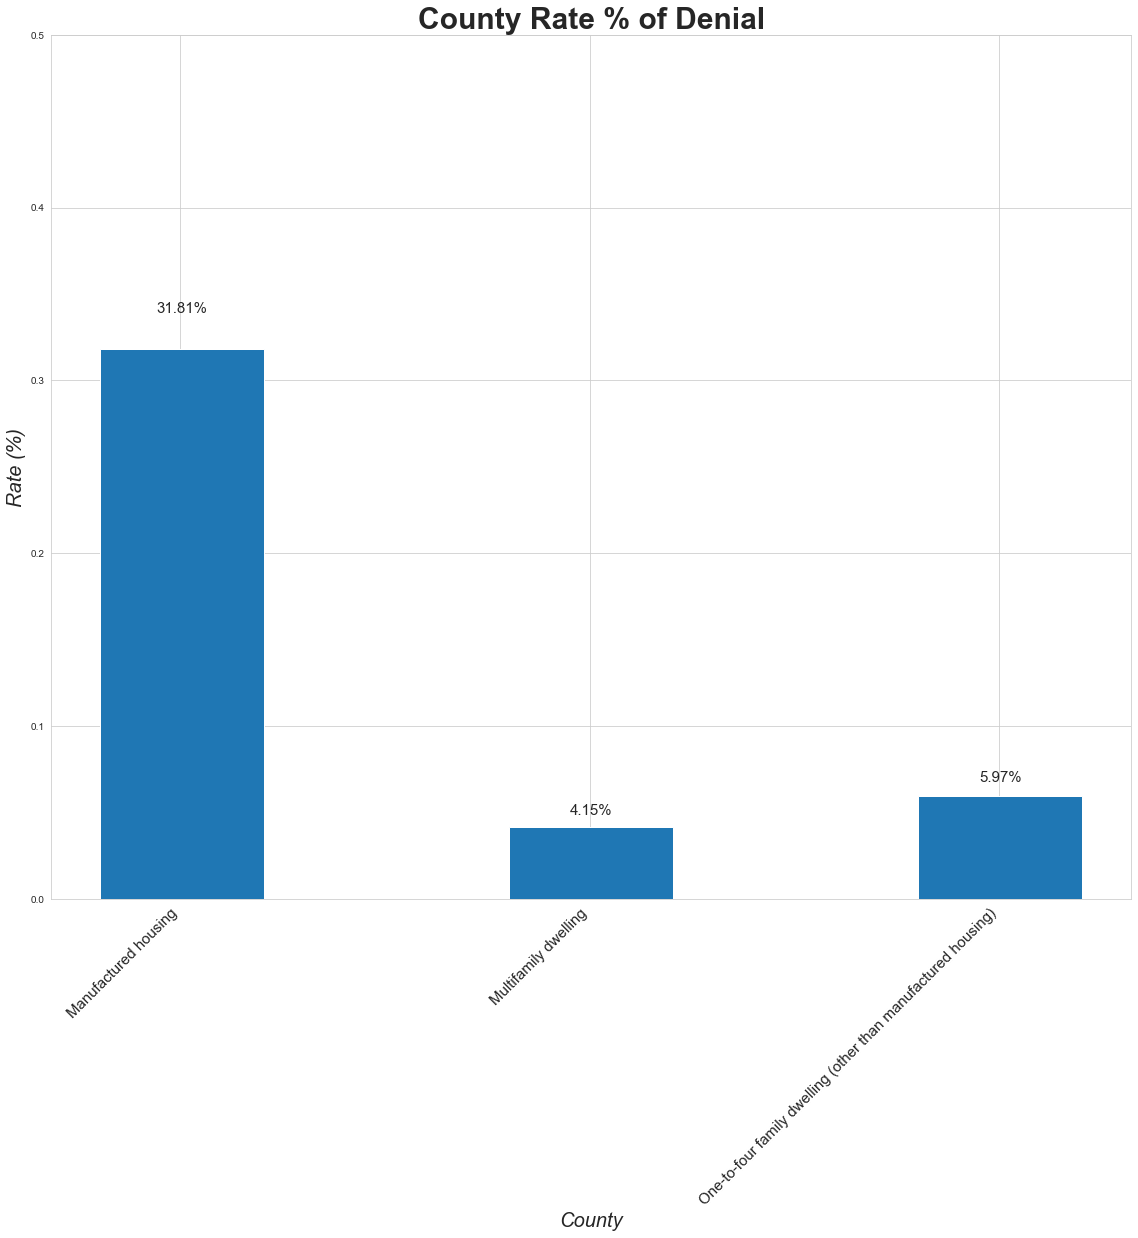

In [339]:
rate_barplot(df_hp['property_type_name'], 'Denial', 'County Rate % of Denial', 'County', 'Rate (%)', 0.50, 0.40)

### Lets look at the rate spread for individuals that have been approved.

Text(0.5, 1.0, 'Rate Spread for Interest Rates in NJ:2017')

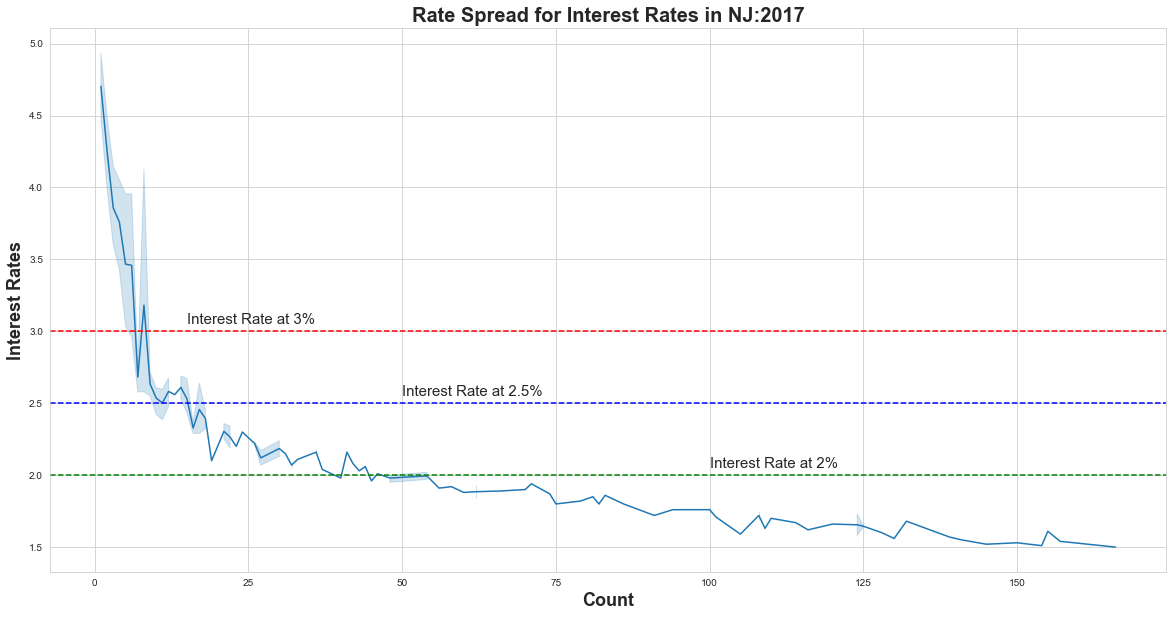

In [8]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax1 = sns.lineplot(x=df_hp.rate_spread.value_counts(),
                   y=df_hp.rate_spread.value_counts().index)

ax1.axhline(y=3.0, color='r', ls='--')
ax1.text(15,3.05, 'Interest Rate at 3%', fontsize=15)
ax1.axhline(y=2.5, color='b', ls='--')
ax1.text(50,2.55, 'Interest Rate at 2.5%', fontsize=15)
ax1.axhline(y=2.0, color='g', ls='--')
ax1.text(100,2.05, 'Interest Rate at 2%', fontsize=15)

ax1.set_ylabel('Interest Rates', fontsize=18, weight='semibold')
ax1.set_xlabel('Count', fontsize=18, weight='semibold')
ax1.set_title('Rate Spread for Interest Rates in NJ:2017', fontsize=20, weight='bold')


### What is the most common reason for being denied

Text(0.5, 1.0, 'NJ Mortgage Loan application Denial Reason: 2017')

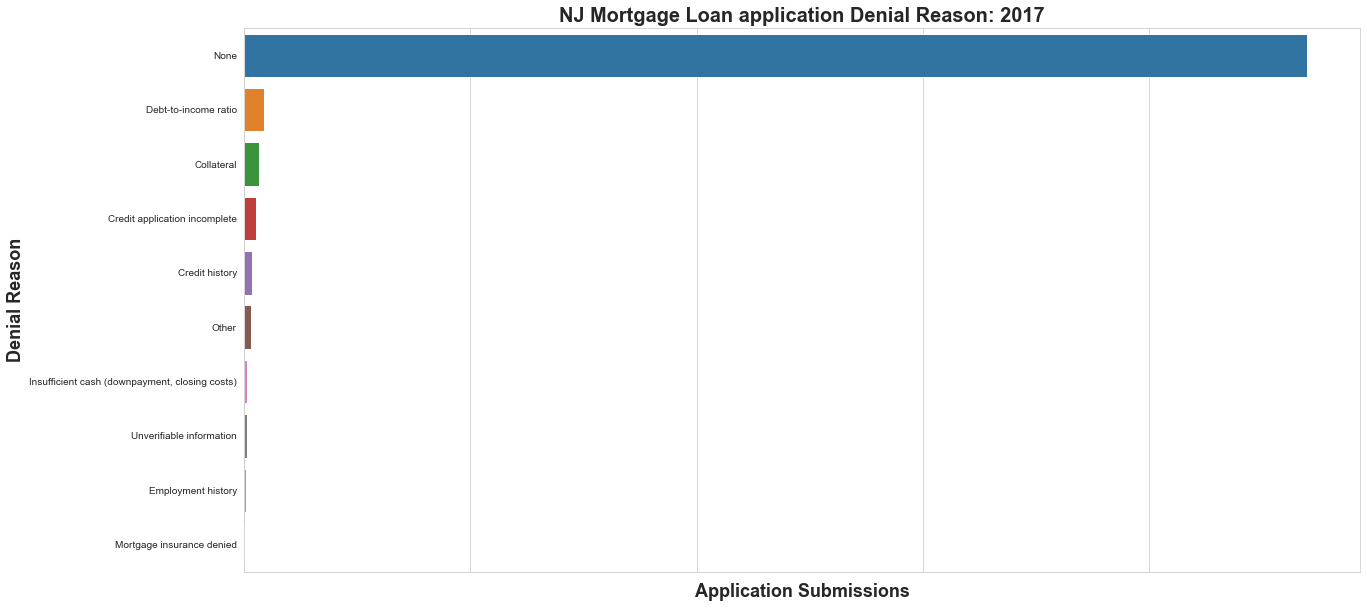

In [346]:
# Highest number of agency names Applicants: Top 10
fig, ax0 = plt.subplots(figsize = (20,10))
ax0 = sns.barplot(x=df_hp.denial_reason_name_1.value_counts(normalize=True),
                  y=df_hp.denial_reason_name_1.value_counts().index)
ax0.set_ylabel('Denial Reason', fontsize=18, weight='semibold')
ax0.set_xlabel('Application Submissions', fontsize=18, weight='semibold')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)
ax0.set_title('NJ Mortgage Loan application Denial Reason: 2017', fontsize=20, weight='bold')

### Denial Reason:Grouped by sex

Text(0.5, 1.0, 'Applicants Count based on Sex: 2017')

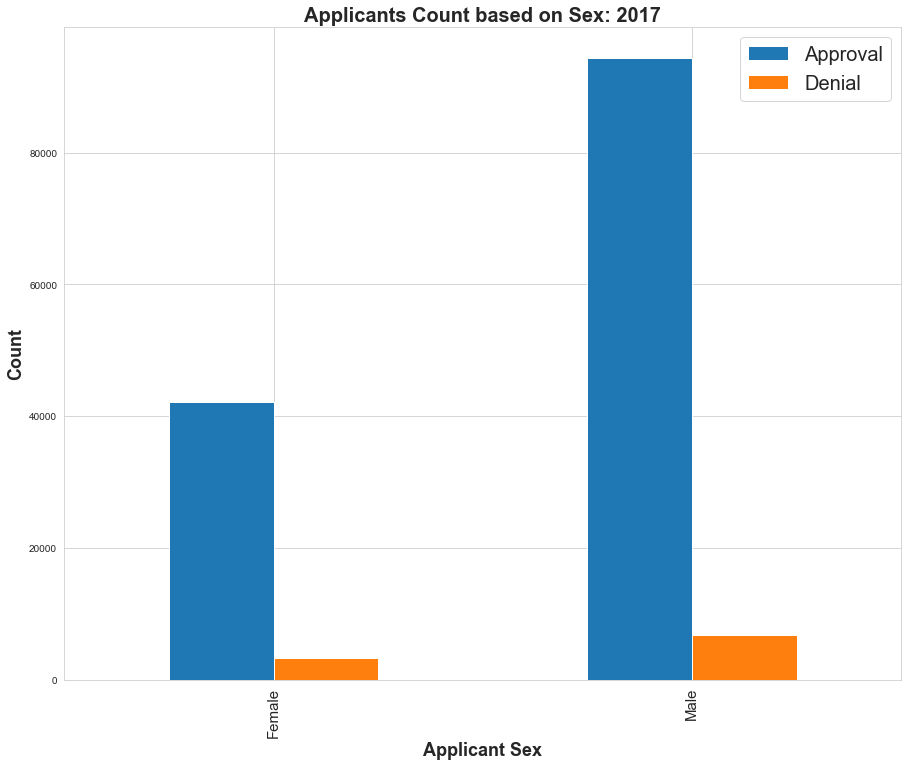

In [542]:
labels = ['Female', 'Male']

ax = pd.crosstab(df_hp['applicant_sex_name'], df_hp['denial']).plot(kind="bar",figsize=(15,12))
ax.set_ylabel('Count', fontsize=18, weight='semibold')
ax.set_xlabel('Applicant Sex', fontsize=18, weight='semibold')
ax.set_xticklabels(labels, fontsize=15)
ax.legend(['Approval','Denial'],prop={'size':20})
ax.set_title('Applicants Count based on Sex: 2017', fontsize=20, weight='bold')

In [430]:
def Denial_reason_rate_per_sex(denial_reason, df):
    
    # Find the total count per sex
    Total_female_count = df.applicant_sex_name.value_counts()[1]
    Total_male_count = df.applicant_sex_name.value_counts()[0]
    
    # Find the total count of applicants for input denial reason per sex 
    female_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_sex_name'])['denial_reason_name_1'].value_counts()[0]
    male_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_sex_name'])['denial_reason_name_1'].value_counts()[1]
    # Find the Percent of input denial reason per applicant submission based on sex
    female_percent = female_count_dr/Total_female_count
    male_percent = male_count_dr/Total_male_count
    
    data_female = {'Female Percent {}'.format(denial_reason): [female_percent],
            'Male Percent {}'.format(denial_reason): [male_percent]}
    
    df_made = pd.DataFrame(data,columns = ['Female Percent {}'.format(denial_reason), 'Male Percent {}'.format(denial_reason)])
   
    return df_made
    

In [438]:
Denial_reason_rate_per_sex('Employment history', df_hp)


,Female Percent Employment history,Male Percent Employment history
0,0.001738,0.001602


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

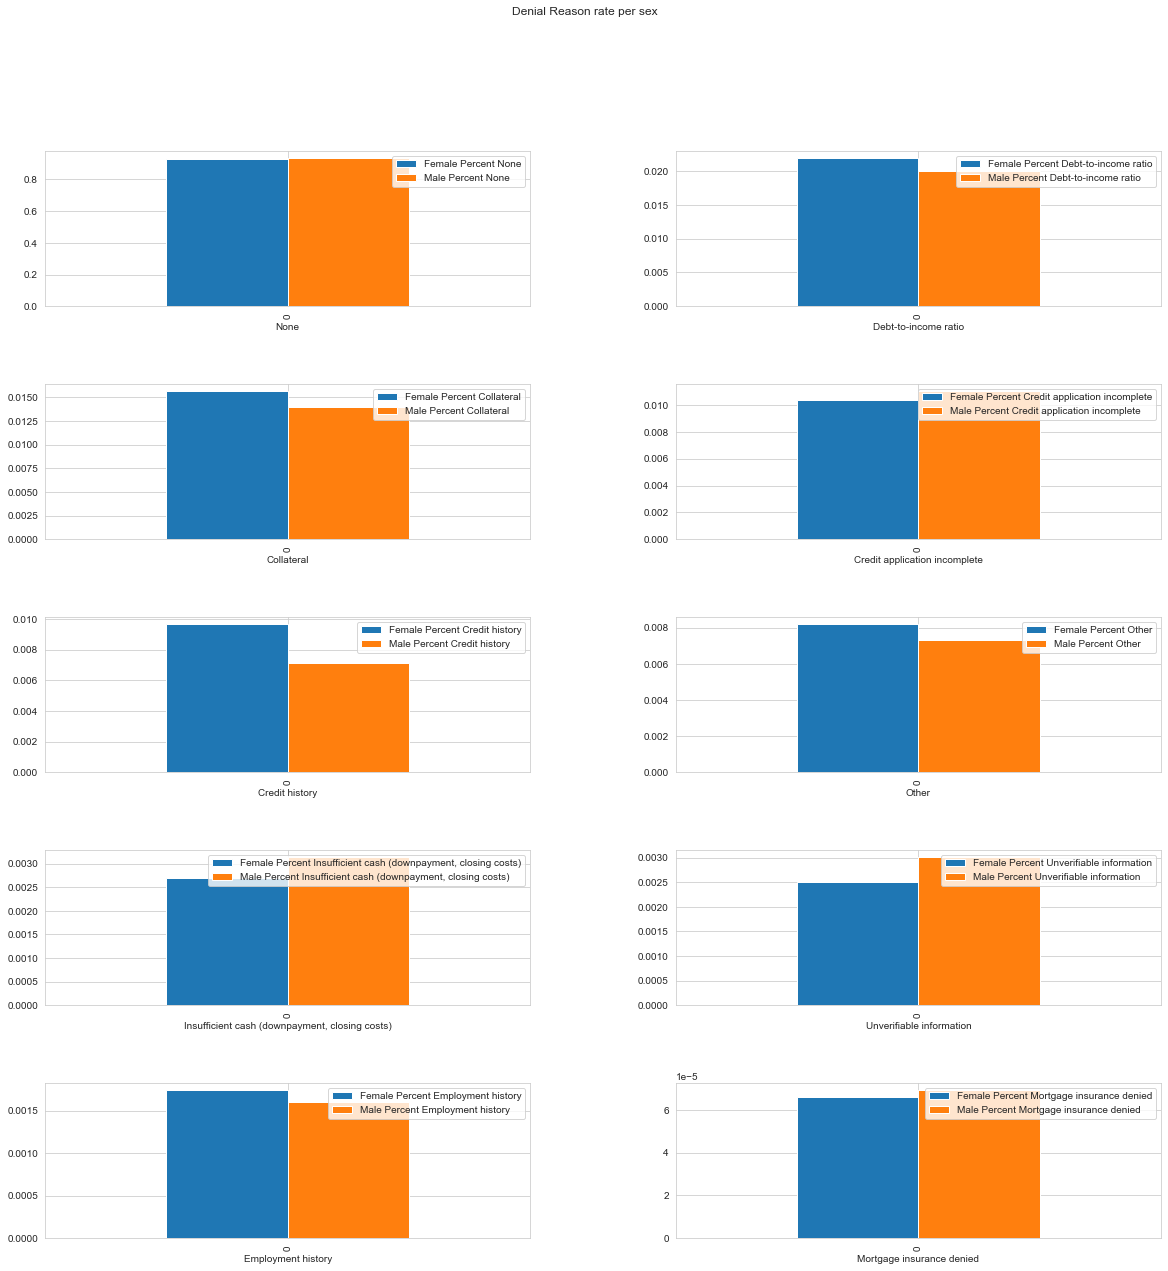

In [440]:
denial_reason = df_hp.denial_reason_name_1.value_counts().index.tolist()

fig, axes = plt.subplots(ncols=2, nrows = 5, figsize =(20,20))
fig.subplots_adjust(hspace = .5, wspace = 0.3)
fig.suptitle('Denial Reason rate per sex')

for ax, col in zip(axes.flatten(), denial_reason):
    Denial_reason_rate_per_sex(col, df_hp).plot(kind='bar', ax = ax)
    ax.set_xlabel(col)
plt.tight_layout

In [458]:
def Denial_reason_rate_per_sex(denial_reason, df, df_sex):
    
    # Find the total count per sex
    Total_female_count = df.applicant_sex_name.value_counts()[1]
    Total_male_count = df.applicant_sex_name.value_counts()[0]
    
    # Find the total count of applicants for input denial reason per sex 
    female_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_sex_name'])['denial_reason_name_1'].value_counts()[0]
    male_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_sex_name'])['denial_reason_name_1'].value_counts()[1]
    # Find the Percent of input denial reason per applicant submission based on sex
    female_percent = female_count_dr/Total_female_count
    male_percent = male_count_dr/Total_male_count
    
    data_female = {'Female Percent {}'.format(denial_reason): [female_percent]}
    data_male = {'Male Percent {}'.format(denial_reason): [male_percent]}
    
    df_female = pd.DataFrame(data_female,columns = ['Female Percent {}'.format(denial_reason)])
    df_male = pd.DataFrame(data_male,columns = ['Male Percent {}'.format(denial_reason)])
    
    if df_sex == 'male':
        return df_male
    if df_sex == 'female':
        return df_female
    

Text(0.5, 1.0, 'Denial Reason Rate per Sex: 2017')

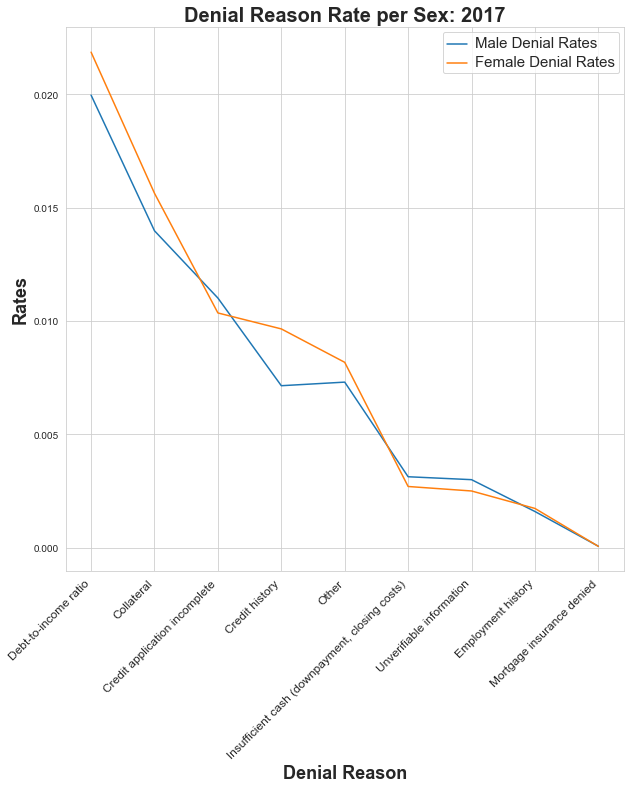

In [519]:
# Have a list of denial reason
denial_reason = df_hp.denial_reason_name_1.value_counts().index.tolist()
# Have a lsit of denial rates
rates_male = []
rates_female = []
# append to lsit
for i in denial_reason:
    rates_male.append(Denial_reason_rate_per_sex(i, df_hp, 'male').iloc[0][0])
    rates_female.append(Denial_reason_rate_per_sex(i, df_hp, 'female').iloc[0][0])
    
data_men = {'Male denial reason': denial_reason,
            'Rates':rates_male}
df_men = pd.DataFrame(data_men)
df_men.drop([0], inplace=True)

data_fem = {'Female denial reason': denial_reason,
            'Rates':rates_female}
df_fem = pd.DataFrame(data_fem)
df_fem.drop([0], inplace=True)
    
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.lineplot(data=df_men, x='Male denial reason', y='Rates', label='Male Denial Rates')
ax = sns.lineplot(data=df_fem, x='Female denial reason', y='Rates', label='Female Denial Rates')

ax.set_ylabel('Rates', fontsize=18, weight='semibold')
ax.set_xlabel('Denial Reason', fontsize=18, weight='semibold')
ax.set_xticklabels(denial_reason[1::],rotation = 45,
                   horizontalalignment='right',
                   fontweight='light',
                   fontsize='large')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.set_title('Denial Reason Rate per Sex: 2017', fontsize=20, weight='bold')

### Denial Reason:Grouped by Ethnicity

In [543]:
df_hp['applicant_ethnicity_name'].value_counts()

Not Hispanic or Latino    121222
Hispanic or Latino         18483
Name: applicant_ethnicity_name, dtype: int64

Text(0.5, 1.0, 'Applicants Count based on Ethnicity: 2017')

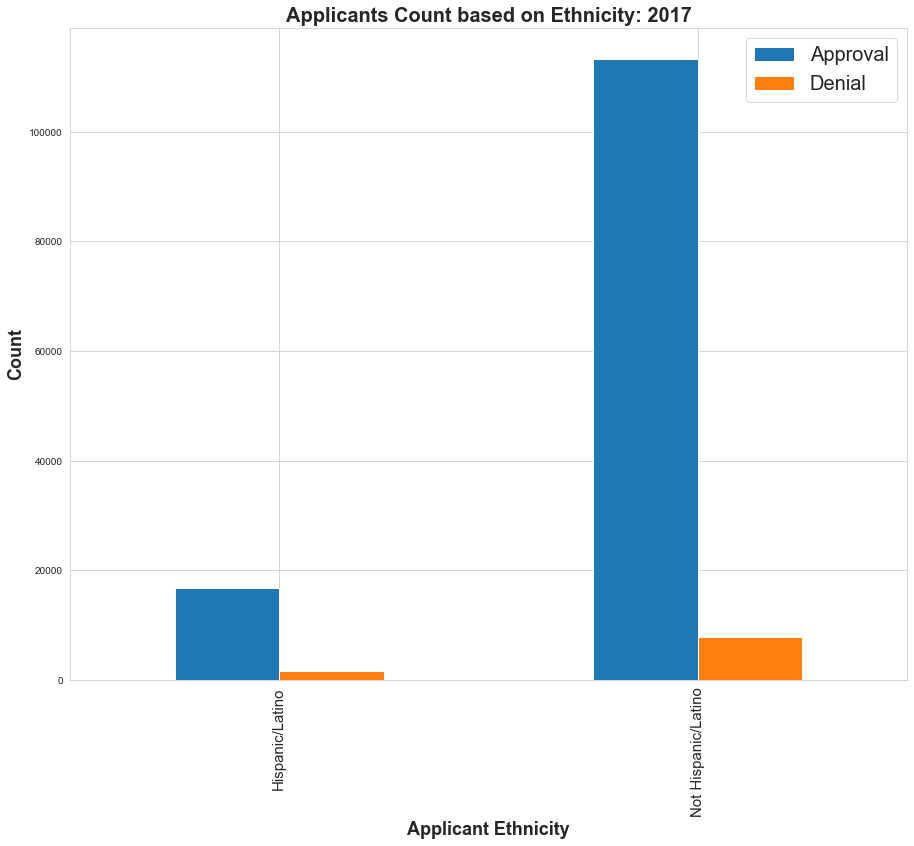

In [545]:
labels = ['Hispanic/Latino', 'Not Hispanic/Latino']

ax = pd.crosstab(df_hp['applicant_ethnicity_name'], df_hp['denial']).plot(kind="bar",figsize=(15,12))
ax.set_ylabel('Count', fontsize=18, weight='semibold')
ax.set_xlabel('Applicant Ethnicity', fontsize=18, weight='semibold')
ax.set_xticklabels(labels, fontsize=15)
ax.legend(['Approval','Denial'],prop={'size':20})
ax.set_title('Applicants Count based on Ethnicity: 2017', fontsize=20, weight='bold')

In [549]:
df_hp.applicant_ethnicity_name.value_counts()[1]

18483

In [552]:
df_hp.loc[df_hp.denial_reason_name_1 == 'Credit history'].groupby(by=['applicant_ethnicity_name'])['denial_reason_name_1'].value_counts()[0]

205

In [577]:
def Denial_reason_rate_per_ethnicity(denial_reason, df, df_ethnicity):
    
    # Find the total count per ethnicity
    Total_hl_count = df.applicant_ethnicity_name.value_counts()[1]
    Total_not_hl_count = df.applicant_ethnicity_name.value_counts()[0]
    
    # Find the total count of applicants for input denial reason per ethnicity
    hl_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_ethnicity_name'])['denial_reason_name_1'].value_counts()[0]
    not_hl_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_ethnicity_name'])['denial_reason_name_1'].value_counts()[1]
    # Find the Percent of input denial reason per applicant submission based on ethnicity
    hl_percent = hl_count_dr/Total_hl_count
    not_hl_percent = not_hl_count_dr/Total_not_hl_count
    
    data_hl = {'Hispanic_Latino Percent {}'.format(denial_reason): [hl_percent]}
    data_not_hl = {'Not_HL Percent {}'.format(denial_reason): [not_hl_percent]}
    
    df_hl = pd.DataFrame(data_hl,columns = ['Hispanic_Latino Percent {}'.format(denial_reason)])
    df_not_hl = pd.DataFrame(data_not_hl,columns = ['Not_HL Percent {}'.format(denial_reason)])
    
    if df_ethnicity == 'not_hl':
        return df_not_hl
    if df_ethnicity == 'hl':
        return df_hl

In [576]:
not_hl_count_dr= df_hp.loc[df_hp.denial_reason_name_1 == 'Other'].groupby(by=['applicant_ethnicity_name'])['denial_reason_name_1'].value_counts()[1]
Total_not_hl_count = df_hp.applicant_ethnicity_name.value_counts()[0]
not_hl_percent = not_hl_count_dr/Total_not_hl_count
data_not_hl = {'Not_HL {}'.format('other'): [not_hl_percent]}
df_not_hl = pd.DataFrame(data_not_hl,columns = ['Not_HL Percent {}'.format('Other')])
df_not_hl

,Not_HL Percent Other


In [578]:
Denial_reason_rate_per_ethnicity('Other', df_hp, 'not_hl')

,Not_HL Percent Other
0,0.006872


In [585]:
# Have a list of denial reason
denial_reason = df_hp.denial_reason_name_1.value_counts().index.tolist()
# Have a lsit of denial rates
rates_not_hl = []
rates_hl = []
# append to lsit
for i in denial_reason:
    rates_not_hl.append(Denial_reason_rate_per_ethnicity(i, df_hp, 'not_hl').iloc[0][0])
    rates_hl.append(Denial_reason_rate_per_ethnicity(i, df_hp, 'hl').iloc[0][0])
    
data_not_hl = {'Not Hispanic_Latino denial reason': denial_reason,
            'Rates':rates_not_hl}
df_not_hl = pd.DataFrame(data_not_hl)
df_not_hl.drop([0], inplace=True)

data_hl = {'Hispanic_Latino denial reason': denial_reason,
            'Rates':rates_hl}
df_hl = pd.DataFrame(data_hl)
df_hl.drop([0], inplace=True)
    
fig, ax3 = plt.subplots(figsize = (10,10))
ax3 = sns.lineplot(data=df_not_hl, x='Not Hispanic_Latino denial reason', y='Rates', label='Not Hispanic/Latino Denial Rates')
ax3 = sns.lineplot(data=df_hl, x='Hispanic_Latino denial reason', y='Rates', label='Hispanic/Latino Denial Rates')

ax3.set_ylabel('Rates', fontsize=18, weight='semibold')
ax3.set_xlabel('Denial Reason', fontsize=18, weight='semibold')
ax3.set_xticklabels(denial_reason[1::],rotation = 45,
                   horizontalalignment='right',
                   fontweight='light',
                   fontsize='large')
plt.setp(ax3.get_legend().get_texts(), fontsize='15')
ax3.set_title('Denial Reason Rate per Ethnicity: 2017', fontsize=20, weight='bold')

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

In [582]:
df_not_hl

,Not Hispanic_Latino denial reason,Rates
1,Debt-to-income ratio,0.019089
2,Collateral,0.014329
3,Credit application incomplete,0.010650
4,Credit history,0.007210
5,Other,0.006872
6,"Insufficient cash (downpayment, closing costs)",0.002846
7,Unverifiable information,0.002689
8,Employment history,0.001452
9,Mortgage insurance denied,0.000058


## For the year 2017, were there any descriminatory lending practices.

### Did race play a role in the decision of loan approvals 

In [9]:
print('applicant_race')
print(df_hp.applicant_race_name_1.value_counts())
print(df_hp.applicant_race_name_2.value_counts())
print(df_hp.applicant_race_name_3.value_counts())
print(df_hp.applicant_race_name_4.value_counts())

applicant_race
White                                                                                106598
Not applicable                                                                        29315
Information not provided by applicant in mail, Internet, or telephone application     18288
Asian                                                                                 18270
Black or African American                                                             11576
Native Hawaiian or Other Pacific Islander                                               462
American Indian or Alaska Native                                                        447
Name: applicant_race_name_1, dtype: int64
White                                        587
Black or African American                     87
Asian                                         52
Native Hawaiian or Other Pacific Islander     39
American Indian or Alaska Native              11
Name: applicant_race_name_2, dtype: int64
White       

An applicants 2nd, 3rd and 4th race identities represent about 1 percent of their respective race class. For this reason I will just consider every applicants 1st race in this analysis. 

In [10]:
df_hp.drop(['applicant_race_name_2', 'applicant_race_name_3', 'applicant_race_name_4', 'applicant_race_name_5',
         'co_applicant_race_name_2', 'co_applicant_race_name_3', 'co_applicant_race_name_4', 'co_applicant_race_name_5'],
         axis=1, inplace=True)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0, 'White'),
 Text(0, 0, 'Not applicable'),
 Text(0, 0, 'Information not provided by applicant in mail, Internet, or telephone application'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Black or African American'),
 Text(0, 0, 'Native Hawaiian or Other Pacific Islander'),
 Text(0, 0, 'American Indian or Alaska Native')]

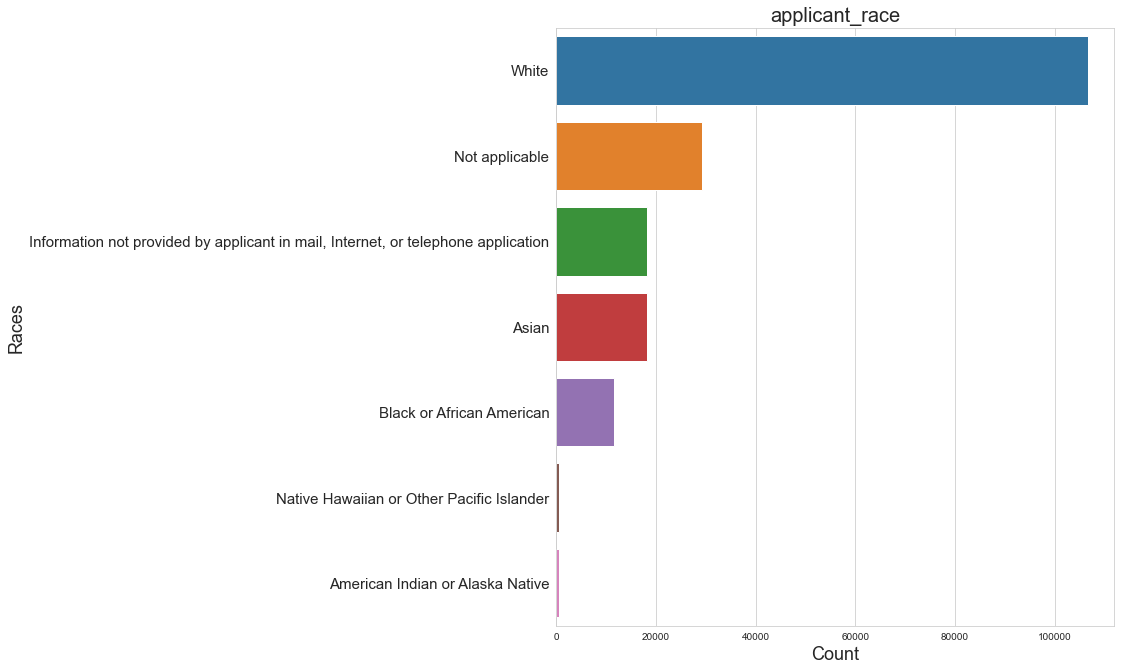

In [11]:
fig, ax1 = plt.subplots(figsize = (10,11))
ax1 = sns.barplot(x=df_hp.applicant_race_name_1.value_counts(),
                   y=df_hp.applicant_race_name_1.value_counts().index,)
                   
ax1.set_ylabel('Races', fontsize=18)
ax1.set_xlabel('Count', fontsize=18)
ax1.set_title('applicant_race', fontsize=20)
ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize=15)



### Did ethincity play a role in the decision of loan approvals

# Questions to look into later

1. Does the type of loan affect the ability to be approved for a loan
2. Is being preapproved necessary for obtaining a mortgage loan
3. Does the property type affect thier ability to get a loan


# Cleaning data

In [12]:
df_hp.isna().sum()

agency_name                            0
loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
owner_occupancy_name                   0
loan_amount_000s                      28
preapproval_name                       0
msamd_name                           624
county_name                          583
applicant_ethnicity_name               0
co_applicant_ethnicity_name            0
applicant_race_name_1                  0
co_applicant_race_name_1               0
applicant_sex_name                     0
co_applicant_sex_name                  0
applicant_income_000s              26306
purchaser_type_name                    0
denial_reason_name_1              173702
denial_reason_name_2              182720
denial_reason_name_3              184555
rate_spread                       177964
hoepa_status_name                      0
lien_status_name                       0
population                           591
minority_populat

As discussed above, there are values within the columns that need to be changed to NaN. This will increase the number of missing values.

In [13]:
# Replace
replace_dict = {
    'owner_occupancy_name': ['Not applicable'],
    'applicant_ethnicity_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'co_applicant_ethnicity_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'applicant_race_name_1':['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'co_applicant_race_name_1':['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'lien_status_name': ['Not applicable'],
    'applicant_sex_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'co_applicant_sex_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'preapproval_name': ['Not applicable'],
    
}

df_hp.replace(replace_dict, np.nan, inplace=True)
df_hp.isna().sum()

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


agency_name                            0
loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
owner_occupancy_name                 686
loan_amount_000s                      28
preapproval_name                  124410
msamd_name                           624
county_name                          583
applicant_ethnicity_name           45251
co_applicant_ethnicity_name        32637
applicant_race_name_1              47603
co_applicant_race_name_1           33519
applicant_sex_name                 38406
co_applicant_sex_name              29406
applicant_income_000s              26306
purchaser_type_name                    0
denial_reason_name_1              173702
denial_reason_name_2              182720
denial_reason_name_3              184555
rate_spread                       177964
hoepa_status_name                      0
lien_status_name                   40111
population                           591
minority_populat

In [14]:
df_hp.reset_index(drop=True, inplace=True)

In [15]:
df_hp.purchaser_type_name.value_counts()

Loan was not originated or was not sold in calendar year covered by register    75950
Fannie Mae (FNMA)                                                               25766
Ginnie Mae (GNMA)                                                               24962
Freddie Mac (FHLMC)                                                             20533
Life insurance company, credit union, mortgage bank, or finance company         17228
Commercial bank, savings bank or savings association                            11818
Other type of purchaser                                                          6454
Affiliate institution                                                            1494
Private securitization                                                            748
Farmer Mac (FAMC)                                                                   3
Name: purchaser_type_name, dtype: int64

# Feature Engineering

In [16]:
# Create the feature binomial class

# Replace all the nan in denial_reason_name_1 & 2 & 3 to None
df_hp.denial_reason_name_1.replace(np.nan, 'None',inplace=True)
df_hp.denial_reason_name_2.replace(np.nan, 'None',inplace=True)
df_hp.denial_reason_name_3.replace(np.nan, 'None',inplace=True)

# Create the binomial class to predict denials by creating a column for the applicants that got denied
df_hp['denial'] = [1 if denial_reason != 'None' else 0 for denial_reason in df_hp['denial_reason_name_1']]

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


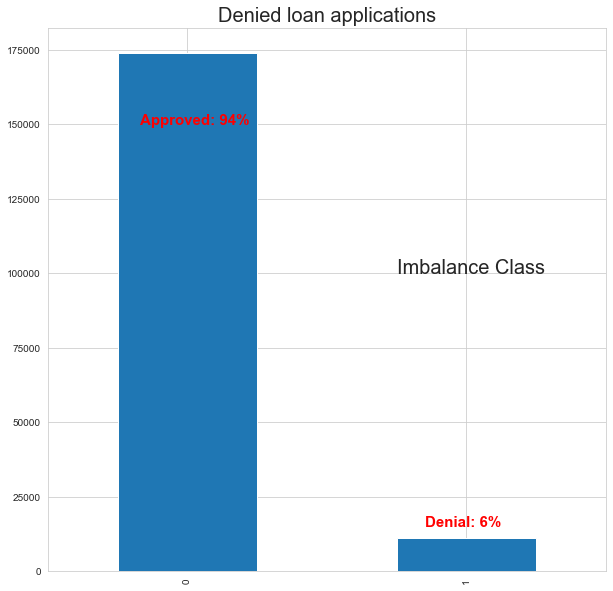

0    0.939153
1    0.060847
Name: denial, dtype: float64

In [17]:
df_hp["denial"].value_counts().plot(kind='bar', figsize=(10,10))
plt.title('Denied loan applications', fontsize=20)
plt.text(.75,100000, 'Imbalance Class', fontsize=20)
plt.text(-0.17,150000, 'Approved: 94%', fontsize=15, weight='bold', color= 'r')
plt.text(0.85,15000, 'Denial: 6%', fontsize=15, weight='bold', color= 'r')
plt.show()
df_hp["denial"].value_counts(normalize = 'index')

In [18]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184956 entries, 0 to 184955
Data columns (total 30 columns):
agency_name                       184956 non-null object
loan_type_name                    184956 non-null object
property_type_name                184956 non-null object
loan_purpose_name                 184956 non-null object
owner_occupancy_name              184270 non-null object
loan_amount_000s                  184928 non-null float64
preapproval_name                  60546 non-null object
msamd_name                        184332 non-null object
county_name                       184373 non-null object
applicant_ethnicity_name          139705 non-null object
co_applicant_ethnicity_name       152319 non-null object
applicant_race_name_1             137353 non-null object
co_applicant_race_name_1          151437 non-null object
applicant_sex_name                146550 non-null object
co_applicant_sex_name             155550 non-null object
applicant_income_000s             

In [20]:
# Create a feature for applicants that have a co_applicant
df_hp['co_applicant'] = [0 if co_applicant == 'No co-applicant' else 1 for co_applicant in df_hp['co_applicant_sex_name']]

# Preprocessing Dataset

In [21]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Organize your columns to sections to streamline any repeative changes
cat_few_selection = ['loan_type_name', 'property_type_name', 'owner_occupancy_name', 'preapproval_name','applicant_ethnicity_name',
                     'co_applicant_ethnicity_name','applicant_race_name_1','co_applicant_race_name_1','co_applicant_sex_name',
                     'applicant_sex_name','lien_status_name','hoepa_status_name']

cat_many_selection = ['agency_name', 'msamd_name', 'county_name', 'purchaser_type_name']

numerical_cols = ['loan_amount_000s', 'applicant_income_000s', 'population','number_of_owner_occupied_units',
                  'number_of_1_to_4_family_units','minority_population', 'hud_median_family_income','tract_to_msamd_income']

to_drop = ['rate_spread', 'loan_purpose_name', 'denial_reason_name_1',
           'denial_reason_name_2', 'denial_reason_name_3']

#instatiate LabelEncoder
le = LabelEncoder()

df_hp_processed = df_hp.copy()

for col in cat_many_selection:
    df_hp_processed[col] = le.fit_transform(df_hp_processed[col])
for col in cat_few_selection:
    df_hp_processed[col] = le.fit_transform(df_hp_processed[col])

In [22]:
df_hp.purchaser_type_name.value_counts()

Loan was not originated or was not sold in calendar year covered by register    75950
Fannie Mae (FNMA)                                                               25766
Ginnie Mae (GNMA)                                                               24962
Freddie Mac (FHLMC)                                                             20533
Life insurance company, credit union, mortgage bank, or finance company         17228
Commercial bank, savings bank or savings association                            11818
Other type of purchaser                                                          6454
Affiliate institution                                                            1494
Private securitization                                                            748
Farmer Mac (FAMC)                                                                   3
Name: purchaser_type_name, dtype: int64

In [23]:
def check_column(column_name, df_1, df_2):
    ''' Looking at the columns that need to be dropped '''
    print(df_1[column_name].value_counts())
    print('----------------------------------')
    print(df_2[column_name].value_counts())

In [24]:
check_column('co_applicant_sex_name', df_hp, df_hp_processed)

No co-applicant    92373
Female             47231
Male               15946
Name: co_applicant_sex_name, dtype: int64
----------------------------------
2    92373
0    47231
3    29406
1    15946
Name: co_applicant_sex_name, dtype: int64


The following columns will be dropped for the following:

1. replace the numbers that represent Nan 
2. No co-applicant, a column was already established for this 

1)'applicant_ethnicity_name_2','co_applicant_ethnicity_name_3',
'applicant_sex_name_2', , 'co_applicant_sex_name_3', 
'applicant_race_name_1_5', 'co_applicant_race_name_1_6',
'owner_occupancy_name_2',
'lien_status_name_2'

2) 'co_applicant_ethnicity_name_1', 'co_applicant_sex_name_2', 'co_applicant_race_name_1_4', 'preapproval_name_2'

In [25]:
# Replace
replace_dict = {
    'applicant_ethnicity_name': [2],
    'co_applicant_ethnicity_name': [3],
    'applicant_sex_name': [2],
    'co_applicant_sex_name': [3],
    'applicant_race_name_1':[5],
    'co_applicant_race_name_1':[6],
    'lien_status_name': [2],
    'owner_occupancy_name': [2]
    }

df_hp_processed.replace(replace_dict, np.nan, inplace=True)

In [26]:
# Replace the NaN with thier specified central tendency
for col in numerical_cols:
    df_hp_processed[col].fillna(df_hp_processed[col].median(), inplace=True)
for col in cat_many_selection:
    df_hp_processed[col].fillna(df_hp_processed[col].median(), inplace=True)
for col in cat_few_selection:
    df_hp_processed[col].fillna(df_hp_processed[col].mode(), inplace=True)
# Drop action_taken_name: It represents repeative information that can be made from the denial column and does not serve this analyse
df_hp_processed.drop(to_drop, axis=1, inplace=True)

df_hp_processed= pd.get_dummies(df_hp_processed, drop_first=True, columns = cat_few_selection)

In [27]:
df_hp_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184956 entries, 0 to 184955
Data columns (total 38 columns):
agency_name                        184956 non-null int32
loan_amount_000s                   184956 non-null float64
msamd_name                         184956 non-null int32
county_name                        184956 non-null int32
applicant_income_000s              184956 non-null float64
purchaser_type_name                184956 non-null int32
population                         184956 non-null float64
minority_population                184956 non-null float64
hud_median_family_income           184956 non-null float64
tract_to_msamd_income              184956 non-null float64
number_of_owner_occupied_units     184956 non-null float64
number_of_1_to_4_family_units      184956 non-null float64
denial                             184956 non-null int64
loan_type_name_1                   184956 non-null uint8
loan_type_name_2                   184956 non-null uint8
loan_type_name_3  

In [28]:
df_hp_processed.drop([ 'co_applicant_ethnicity_name_1.0', 'co_applicant_sex_name_2.0', 'co_applicant_race_name_1_4.0',
                       'preapproval_name_2'], axis=1, inplace=True)

In [29]:
df_hp_processed.columns= df_hp_processed.columns.str.replace('.0','')

In [30]:
df_hp_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184956 entries, 0 to 184955
Data columns (total 34 columns):
agency_name                       184956 non-null int32
loan_amounts                      184956 non-null float64
msamd_name                        184956 non-null int32
county_name                       184956 non-null int32
applicant_incomes                 184956 non-null float64
purchaser_type_name               184956 non-null int32
population                        184956 non-null float64
minority_population               184956 non-null float64
hud_median_family_income          184956 non-null float64
tract_to_msamd_income             184956 non-null float64
number_of_owner_occupied_units    184956 non-null float64
number_of_1_to_4_family_units     184956 non-null float64
denial                            184956 non-null int64
loan_type_name_1                  184956 non-null uint8
loan_type_name_2                  184956 non-null uint8
loan_type_name_3                 

In [31]:
df_hp_processed.isna().sum().any()

False

# Create training and test sets

In [32]:
from sklearn.model_selection import train_test_split
# Sperate your X and y variable
y = df_hp_processed.denial
X = df_hp_processed.drop(['denial'], axis=1)
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data

In [33]:
# Import StandardScalar
from sklearn.preprocessing import StandardScaler

# Instatiate StandScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create data frame
scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_train.head()

,agency_name,loan_amounts,msamd_name,county_name,applicant_incomes,purchaser_type_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,...,applicant_race_name_1_3,applicant_race_name_1_4,co_applicant_race_name_1_1,co_applicant_race_name_1_2,co_applicant_race_name_1_3,co_applicant_race_name_1_5,co_applicant_sex_name_1,applicant_sex_name_1,lien_status_name_1,hoepa_status_name_1
0,-0.955279,-0.094616,1.43847,-0.944955,-0.345195,-1.490568,-0.616805,-0.125611,-0.844908,-1.812507,...,-0.048907,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301
1,0.174273,0.085772,-0.21211,-1.465882,-0.071301,0.827948,0.489685,0.151118,-0.820448,-0.352869,...,-0.048907,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,0.911847,-0.073581,0.009301
2,0.174273,-0.040962,-1.03740,-1.118597,0.049535,0.827948,-1.292748,-0.768635,0.630882,0.643090,...,-0.048907,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,-1.096675,-0.073581,0.009301
3,0.174273,-0.031711,-0.21211,0.965112,-0.031022,0.364245,-0.088295,0.616928,-0.820448,-0.821094,...,-0.048907,0.859553,-0.209287,-0.125294,-0.033554,1.692045,3.256116,0.911847,-0.073581,0.009301
4,0.174273,-0.050213,-1.03740,-1.118597,-0.059217,1.291651,-0.838690,-0.256130,0.630882,-0.433868,...,-0.048907,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301


# Recall vs Precision: In this analysis we will focus on optimizing Recall 

### recall = TP / (TP + FN)
### precision = TP / (TP + FP)

- False Negative suggest that the model predicted that an individual that should have been denied got approved for a loan 
- False Positive suggest that the model predicted that an individual that should have been approved got denied for a loan 

In conclusion, a false negative in this case would effect the banks more than that of a false positive. 

# Fit a KNN model

In [34]:
# Import KNeighborsClassifer
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf_KNN = KNeighborsClassifier()

# fit Classifer
clf_KNN.fit(scaled_X_train, y_train)

# Predict on the test set 

y_preds_KNN = clf_KNN.predict(scaled_X_test)

In [35]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

#Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

# Check performance Metrics 
performance_metrics_KNN= print_metrics(y_test, y_preds_KNN)


Precision Score: 0.24282982791587
Recall Score: 0.04532476802284083
Accuracy Score: 0.933584203810636
F1 Score: 0.07639097744360901


The accuracy is :0.93

AUC is :0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     43437
           1       0.24      0.05      0.08      2802

    accuracy                           0.93     46239
   macro avg       0.59      0.52      0.52     46239
weighted avg       0.90      0.93      0.91     46239



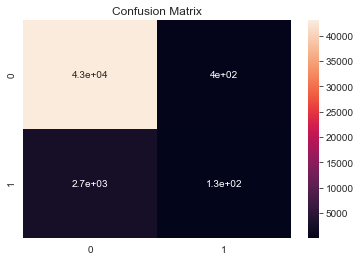

In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_KNN)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_KNN)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print your accuracy_score, classification report, and confusion matrix 

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test, y_preds_KNN))

sns.heatmap(confusion_matrix(y_test, y_preds_KNN), annot=True)
plt.title("Confusion Matrix")
plt.show()

Results: From evaluating the performance metrics we can see that this model is terrible at predicting the target variable. The problem might be the imbalance that is present in the target variable. 

# Dealing with Imbalanced Class

1. Changing the attribute weight= 'distance'

In [37]:
# Instantiate KNeighborsClassifier
clf_KNN = KNeighborsClassifier(weights='distance')

# fit Classifer
clf_KNN.fit(scaled_X_train, y_train)

# Predict on the test set 

y_preds_KNN = clf_KNN.predict(scaled_X_test)

In [38]:
# Check performance Metrics 
performance_metrics_KNN= print_metrics(y_test, y_preds_KNN)

Precision Score: 0.23648029330889092
Recall Score: 0.09207708779443255
Accuracy Score: 0.9269664136335128
F1 Score: 0.13254559465707683


The accuracy is :0.93

AUC is :0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     43437
           1       0.24      0.09      0.13      2802

    accuracy                           0.93     46239
   macro avg       0.59      0.54      0.55     46239
weighted avg       0.90      0.93      0.91     46239



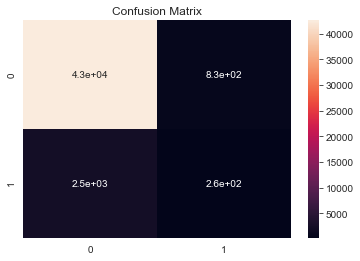

In [39]:
# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_KNN)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_KNN)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print your accuracy_score, classification report, and confusion matrix 

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test, y_preds_KNN))

sns.heatmap(confusion_matrix(y_test, y_preds_KNN), annot=True)
plt.title("Confusion Matrix")
plt.show()

# Fit a Decision Tree (class_weight='balanced')

In [96]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn import tree

# Instantiate DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(random_state=10, class_weight='balanced')

# fit classifer
clf_Decision_Tree.fit(scaled_X_train, y_train)

# predict  on the test set 
y_preds_Decision_Tree = clf_Decision_Tree.predict(scaled_X_test)

In [97]:
# Metric
print('Using the Descison Tree Method weighted:')
performance_metrics_Decision_Tree = print_metrics(y_test, y_preds_Decision_Tree)

Using the Descison Tree Method weighted:
Precision Score: 0.7242359630419332
Recall Score: 0.7273376159885796
Accuracy Score: 0.9666947814615368
F1 Score: 0.7257834757834759


The accuracy is :0.97

AUC is :0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     43437
           1       0.72      0.73      0.73      2802

    accuracy                           0.97     46239
   macro avg       0.85      0.85      0.85     46239
weighted avg       0.97      0.97      0.97     46239



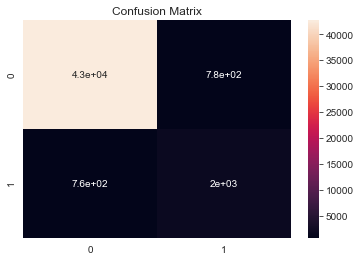

In [98]:
# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_Decision_Tree)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_Decision_Tree)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test,y_preds_Decision_Tree))

sns.heatmap(confusion_matrix(y_test, y_preds_Decision_Tree), annot=True)
plt.title('Confusion Matrix')
plt.show()

Must address 
- recall increase
- accuracy & auc
- 

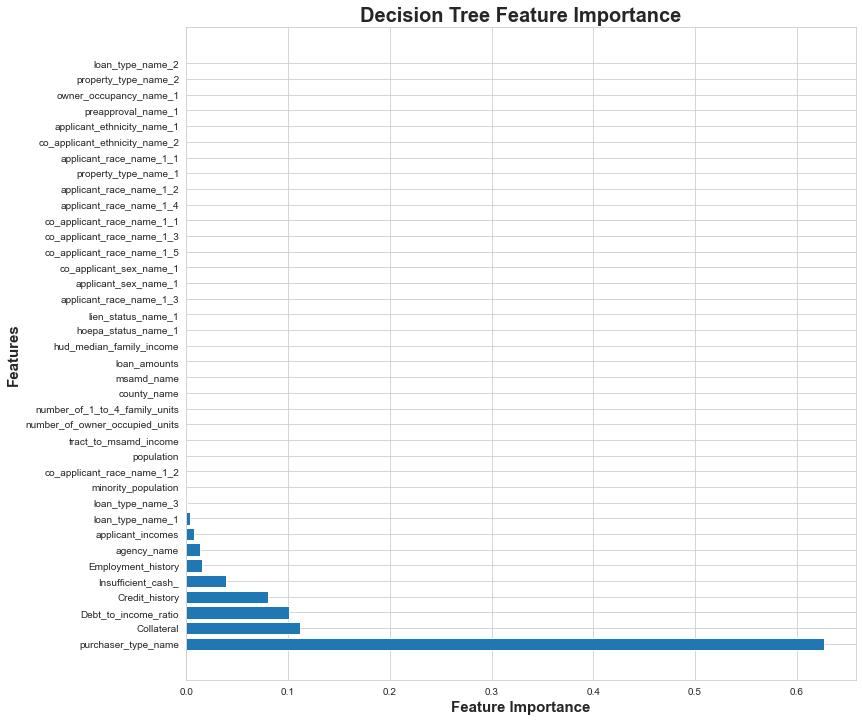

<Figure size 432x288 with 0 Axes>

In [323]:
# Plotting Feature importances
def important_features(model, columns):
    ''' Plots the important features of a decision tree in decending order'''
    #The top features of the model
    top_features = model.feature_importances_
    #creating a list of column names
    feature_names=columns
    #Sort feature importances in decending order
    indices= np.argsort(top_features)[::-1]
    #Rearrange Feature names so they match the sorted feature importance
    names= [feature_names[i] for i in indices]
    #Create number of features
    n_features = X_train.shape[1]
    #Create plot
    plt.figure(figsize=(12,12))
    #Create horizontal bar chart
    plt.barh(range(n_features), top_features[indices], align='center')
    #X and y labels
    plt.xlabel("Feature Importance", fontsize=15, weight='semibold')
    plt.ylabel("Features", fontsize=15, weight='semibold')
    # Add feature names as y-axis labels
    plt.yticks(range(n_features), names)
    #Add title
    plt.title('Decision Tree Feature Importance', fontsize=20, weight='bold')
    plt.show()
    
important_features(clf_Decision_Tree,X.columns.tolist())
plt.tight_layout()

# Feature Engineering part 2 

In [46]:
# Create a copy of the dataframe that was used in your first initial models
df_2 = df_hp.copy()

In [47]:
# Creating the individual features for the denial reasons

# Create index column
df_2['index'] = df_hp.index

# Create a list of all the denial reasons
denial_reason= df_hp.denial_reason_name_1.unique().tolist()[1::]

# Create a function that classifies whether an applicant was denied for input denial_reason
def modified_dataframe(denial_reason, df):
    ''' Creates a function that locates whether an applicant was denied for input denial_reason, if it was it gets counted on
         a new df'''
    # Locate if an applicant got denied for input denial reason
    df_new = df.loc[(df.denial_reason_name_1 == denial_reason) | (df.denial_reason_name_2 == denial_reason) |
                    (df.denial_reason_name_3 == denial_reason)]
    # Create new dataframe that counts 1 for the applicants that were found to have input denial reason
    df_new[denial_reason] = [1 for i in range(0, df_new.shape[0])]
    
    return df_new

# Merge this new dataframe onto the original dataframe
for i in denial_reason:
    df_2 = pd.merge(df_2, modified_dataframe(i, df_2).loc[:,['index', i]], on='index', how='outer')



C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
#Replace all the unnecessary stuff from column names 
df_2.columns = df_2.columns.str.replace('(downpayment,_closing_costs)','')
df_2.columns = df_2.columns.str.replace(' ','_')
df_2.columns = df_2.columns.str.replace('-','_')
df_2.columns = df_2.columns.str.replace('(','')
df_2.columns = df_2.columns.str.replace(')','')

In [65]:
#check the columns
df_2.columns

Index(['agency_name', 'loan_type_name', 'property_type_name',
       'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s',
       'preapproval_name', 'msamd_name', 'county_name',
       'applicant_ethnicity_name', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'co_applicant_race_name_1',
       'applicant_sex_name', 'co_applicant_sex_name', 'applicant_income_000s',
       'purchaser_type_name', 'denial_reason_name_1', 'denial_reason_name_2',
       'denial_reason_name_3', 'rate_spread', 'hoepa_status_name',
       'lien_status_name', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'denial', 'index', 'Insufficient_cash_', 'Debt_to_income_ratio',
       'Other', 'Credit_history', 'Unverifiable_information', 'Collateral',
       'Credit_application_incomplete', 'Employment_history',
       'Mortgage_insurance_denied'],
      dtype='ob

In [66]:
replace_dict = {
    'Insufficient_cash': np.nan,
    'Debt_to_income_ratio': np.nan,
    'Other': np.nan,
    'Credit_history': np.nan,
    'Unverifiable_information': np.nan,
    'Collateral': np.nan,
    'Credit_application_incomplete': np.nan,
    'Employment_history': np.nan,
    'Mortgage_insurance_denied': np.nan,
}

df_2.replace(replace_dict, 0, inplace=True)
    

In [67]:
df_2.iloc[:, 31:40].replace(np.nan, 0, inplace=True)

In [69]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184956 entries, 0 to 184955
Data columns (total 40 columns):
agency_name                       184956 non-null object
loan_type_name                    184956 non-null object
property_type_name                184956 non-null object
loan_purpose_name                 184956 non-null object
owner_occupancy_name              184270 non-null object
loan_amount_000s                  184928 non-null float64
preapproval_name                  60546 non-null object
msamd_name                        184332 non-null object
county_name                       184373 non-null object
applicant_ethnicity_name          139705 non-null object
co_applicant_ethnicity_name       152319 non-null object
applicant_race_name_1             137353 non-null object
co_applicant_race_name_1          151437 non-null object
applicant_sex_name                146550 non-null object
co_applicant_sex_name             155550 non-null object
applicant_income_000s             

From these new features we will select those that are denial reasons with no other option. 
- Unverifiable information : There is no way a lender will authurize an approved loan if information is not given. 
- Credit application incomplete : This fall in the same scenario. A lender will deny the loan application. 
- Mortgage insurance denied : This suggest that the applicant did not recieve the loan, thus being rejected the insurance
- Other : This to will be dropped from the model. There is no way to really understand this feature and it can be different meaning. 

# Preprocessing Data part 2

In [70]:
# Organize your columns to sections to streamline any repeative changes
cat_few_selection = ['loan_type_name', 'property_type_name', 'owner_occupancy_name', 'preapproval_name','applicant_ethnicity_name',
                     'co_applicant_ethnicity_name','applicant_race_name_1','co_applicant_race_name_1','co_applicant_sex_name',
                     'applicant_sex_name','lien_status_name','hoepa_status_name']

cat_many_selection = ['agency_name', 'msamd_name', 'county_name', 'purchaser_type_name']

numerical_cols = ['loan_amount_000s', 'applicant_income_000s', 'population','number_of_owner_occupied_units',
                  'number_of_1_to_4_family_units','minority_population', 'hud_median_family_income','tract_to_msamd_income']

to_drop = ['rate_spread', 'loan_purpose_name', 'denial_reason_name_1',
           'denial_reason_name_2', 'denial_reason_name_3', 'Unverifiable_information',
           'index', 'Credit_application_incomplete', 'Mortgage_insurance_denied', 'Other']

#instatiate LabelEncoder
le = LabelEncoder()

df_2_processed = df_2.copy()

for col in cat_many_selection:
    df_2_processed[col] = le.fit_transform(df_2_processed[col])
for col in cat_few_selection:
    df_2_processed[col] = le.fit_transform(df_2_processed[col])

In [71]:
# Replace
replace_dict = {
    'applicant_ethnicity_name': [2],
    'co_applicant_ethnicity_name': [3],
    'applicant_sex_name': [2],
    'co_applicant_sex_name': [3],
    'applicant_race_name_1':[5],
    'co_applicant_race_name_1':[6],
    'lien_status_name': [2],
    'owner_occupancy_name': [2]
    }

df_2_processed.replace(replace_dict, np.nan, inplace=True)

In [72]:
# Replace the NaN with thier specified central tendency
for col in numerical_cols:
    df_2_processed[col].fillna(df_2_processed[col].median(), inplace=True)
for col in cat_many_selection:
    df_2_processed[col].fillna(df_2_processed[col].median(), inplace=True)
for col in cat_few_selection:
    df_2_processed[col].fillna(df_2_processed[col].mode(), inplace=True)
# Drop action_taken_name: It represents repeative information that can be made from the denial column and does not serve this analyse
df_2_processed.drop(to_drop, axis=1, inplace=True)

df_2_processed= pd.get_dummies(df_2_processed, drop_first=True, columns = cat_few_selection)

In [84]:
df_2_processed.isna().sum().any()

False

In [73]:
df_2_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184956 entries, 0 to 184955
Data columns (total 43 columns):
agency_name                        184956 non-null int32
loan_amount_000s                   184956 non-null float64
msamd_name                         184956 non-null int32
county_name                        184956 non-null int32
applicant_income_000s              184956 non-null float64
purchaser_type_name                184956 non-null int32
population                         184956 non-null float64
minority_population                184956 non-null float64
hud_median_family_income           184956 non-null float64
tract_to_msamd_income              184956 non-null float64
number_of_owner_occupied_units     184956 non-null float64
number_of_1_to_4_family_units      184956 non-null float64
denial                             184956 non-null int64
Insufficient_cash_                 184956 non-null float64
Debt_to_income_ratio               184956 non-null float64
Credit_history

In [74]:
df_2_processed.drop([ 'co_applicant_ethnicity_name_1.0', 'co_applicant_sex_name_2.0', 'co_applicant_race_name_1_4.0',
                       'preapproval_name_2'], axis=1, inplace=True)

In [75]:
df_2_processed.columns= df_2_processed.columns.str.replace('.0','')

# Create training and test sets part 2

In [76]:
# Sperate your X and y variable
y = df_2_processed.denial
X = df_2_processed.drop(['denial'], axis=1)
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data part 2

In [77]:
# Instatiate StandScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create data frame
scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_train.head()

,agency_name,loan_amounts,msamd_name,county_name,applicant_incomes,purchaser_type_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,...,applicant_race_name_1_3,applicant_race_name_1_4,co_applicant_race_name_1_1,co_applicant_race_name_1_2,co_applicant_race_name_1_3,co_applicant_race_name_1_5,co_applicant_sex_name_1,applicant_sex_name_1,lien_status_name_1,hoepa_status_name_1
0,-0.955279,-0.094616,1.43847,-0.944955,-0.345195,-1.490568,-0.616805,-0.125611,-0.844908,-1.812507,...,-0.048907,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301
1,0.174273,0.085772,-0.21211,-1.465882,-0.071301,0.827948,0.489685,0.151118,-0.820448,-0.352869,...,-0.048907,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,0.911847,-0.073581,0.009301
2,0.174273,-0.040962,-1.03740,-1.118597,0.049535,0.827948,-1.292748,-0.768635,0.630882,0.643090,...,-0.048907,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,-1.096675,-0.073581,0.009301
3,0.174273,-0.031711,-0.21211,0.965112,-0.031022,0.364245,-0.088295,0.616928,-0.820448,-0.821094,...,-0.048907,0.859553,-0.209287,-0.125294,-0.033554,1.692045,3.256116,0.911847,-0.073581,0.009301
4,0.174273,-0.050213,-1.03740,-1.118597,-0.059217,1.291651,-0.838690,-0.256130,0.630882,-0.433868,...,-0.048907,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301


# Decision Tree (class_weight='balanced') w/ new features

In [142]:
# Instantiate DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(random_state=10, class_weight='balanced')

# fit classifer
clf_Decision_Tree.fit(scaled_X_train, y_train)

# predict  on the test set 
y_preds_Decision_Tree = clf_Decision_Tree.predict(scaled_X_test)

In [143]:
# Metric
print('Using the Descison Tree Method weighted:')
performance_metrics_Decision_Tree = print_metrics(y_test, y_preds_Decision_Tree)

Using the Descison Tree Method weighted:
Precision Score: 0.7242359630419332
Recall Score: 0.7273376159885796
Accuracy Score: 0.9666947814615368
F1 Score: 0.7257834757834759


The accuracy is :0.97

AUC is :0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     43437
           1       0.72      0.73      0.73      2802

    accuracy                           0.97     46239
   macro avg       0.85      0.85      0.85     46239
weighted avg       0.97      0.97      0.97     46239



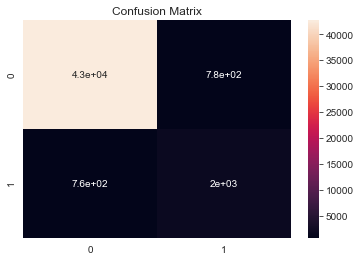

In [144]:
# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_Decision_Tree)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_Decision_Tree)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test,y_preds_Decision_Tree))

sns.heatmap(confusion_matrix(y_test, y_preds_Decision_Tree), annot=True)
plt.title('Confusion Matrix')
plt.show()

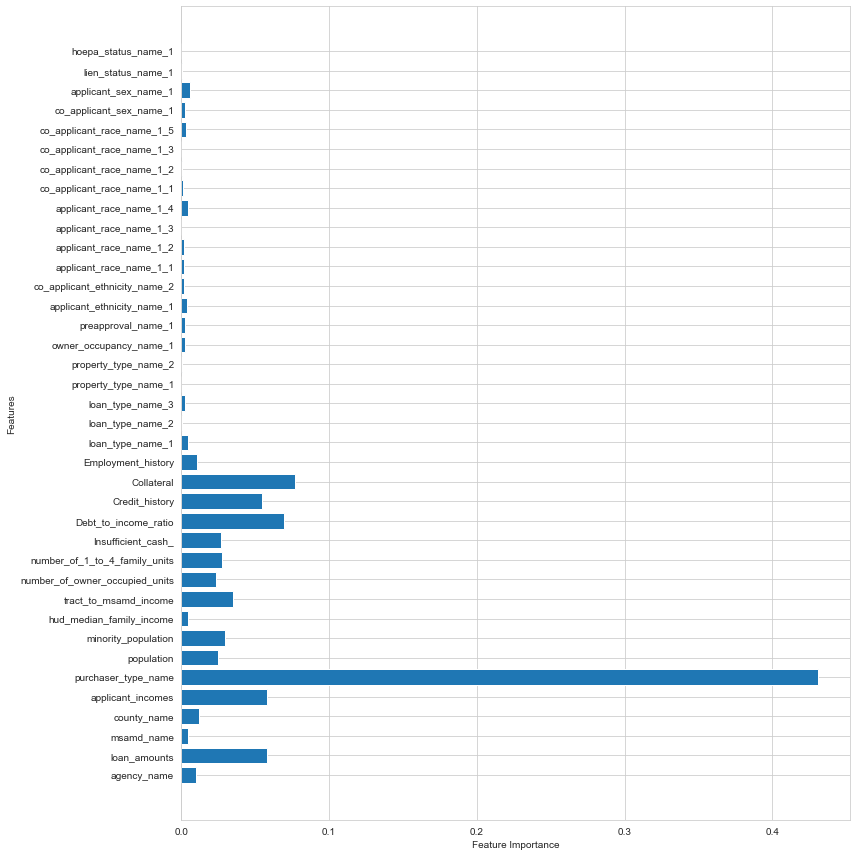

In [145]:
# Plotting Feature importances
important_features(clf_Decision_Tree)
plt.tight_layout()

# Hypertuning: GridSearchCV 

from sklearn.model_selection import GridSearchCV
# Set Parameter for gridsearchCV
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth":[5,10,13,15,16,17,18,19,20,23,25,28,30,35],
    "min_samples_split":range(2,5),
    "min_samples_leaf":range(1,5)
}

# finding the best hyperparameter using gridsearchCV

grid = GridSearchCV(clf_Decision_Tree,
                    param_grid= param_dict,
                    scoring='recall',
                    cv=10,
                    verbose=1,
                    n_jobs=-1)

# fitting to the gridsearch
grid.fit(scaled_X_train, y_train)

# best parameters
print('Best params: %s' % grid.best_params_)
# best training data recall
print('Best recall for training set: %.3f' % grid.best_score_)
# predict from test data
y_pred_grid = grid.predict(scaled_X_test)
# test data recall with best params
print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred_grid))
# confusion matrix and classification report
print('\nClassification Report:')
print(metrics.classification_report(y_test,y_pred_grid))

sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True)
plt.title('Confusion Matrix')
plt.show()
print('Recall score: ',recall_score(y_test, y_pred_grid))

# Final model 

In [311]:
# Instantiate DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(random_state=10, class_weight='balanced', criterion='gini', max_depth=10,
                                           min_samples_leaf=1, min_samples_split=2)

# fit classifer
clf_Decision_Tree.fit(scaled_X_train, y_train)

# predict  on the test set 
y_preds_Decision_Tree = clf_Decision_Tree.predict(scaled_X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     43437
           1       0.30      0.87      0.44      2802

    accuracy                           0.87     46239
   macro avg       0.64      0.87      0.68     46239
weighted avg       0.95      0.87      0.89     46239



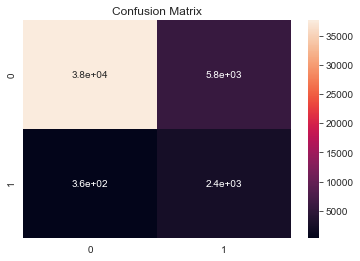

In [312]:
print('\nClassification Report:')
print(metrics.classification_report(y_test,y_preds_Decision_Tree))

sns.heatmap(confusion_matrix(y_test, y_preds_Decision_Tree), annot=True)
plt.title('Confusion Matrix')
plt.show()

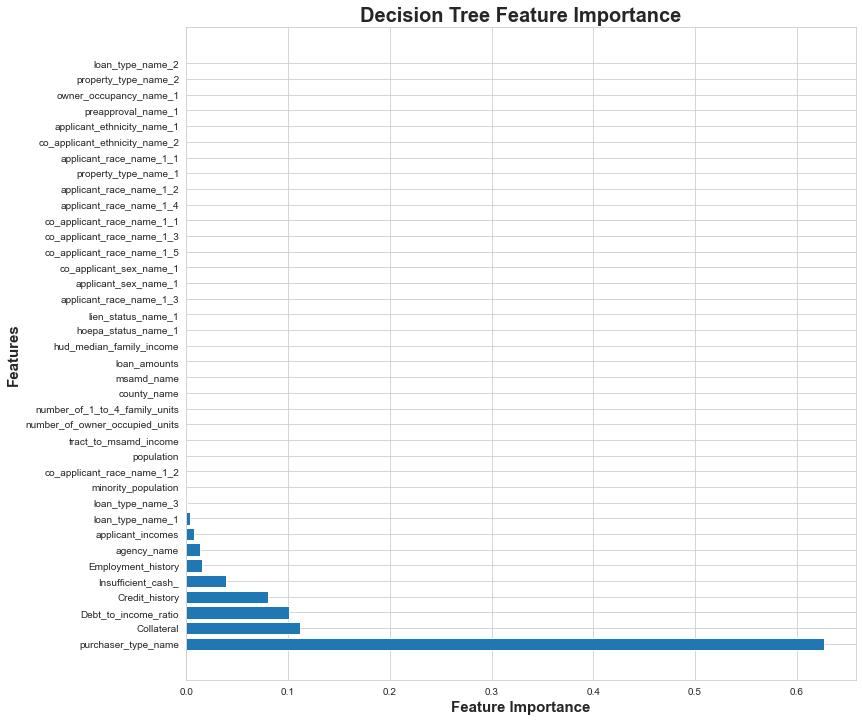

<Figure size 432x288 with 0 Axes>

In [324]:
important_features(clf_Decision_Tree,X.columns.tolist())
plt.tight_layout()

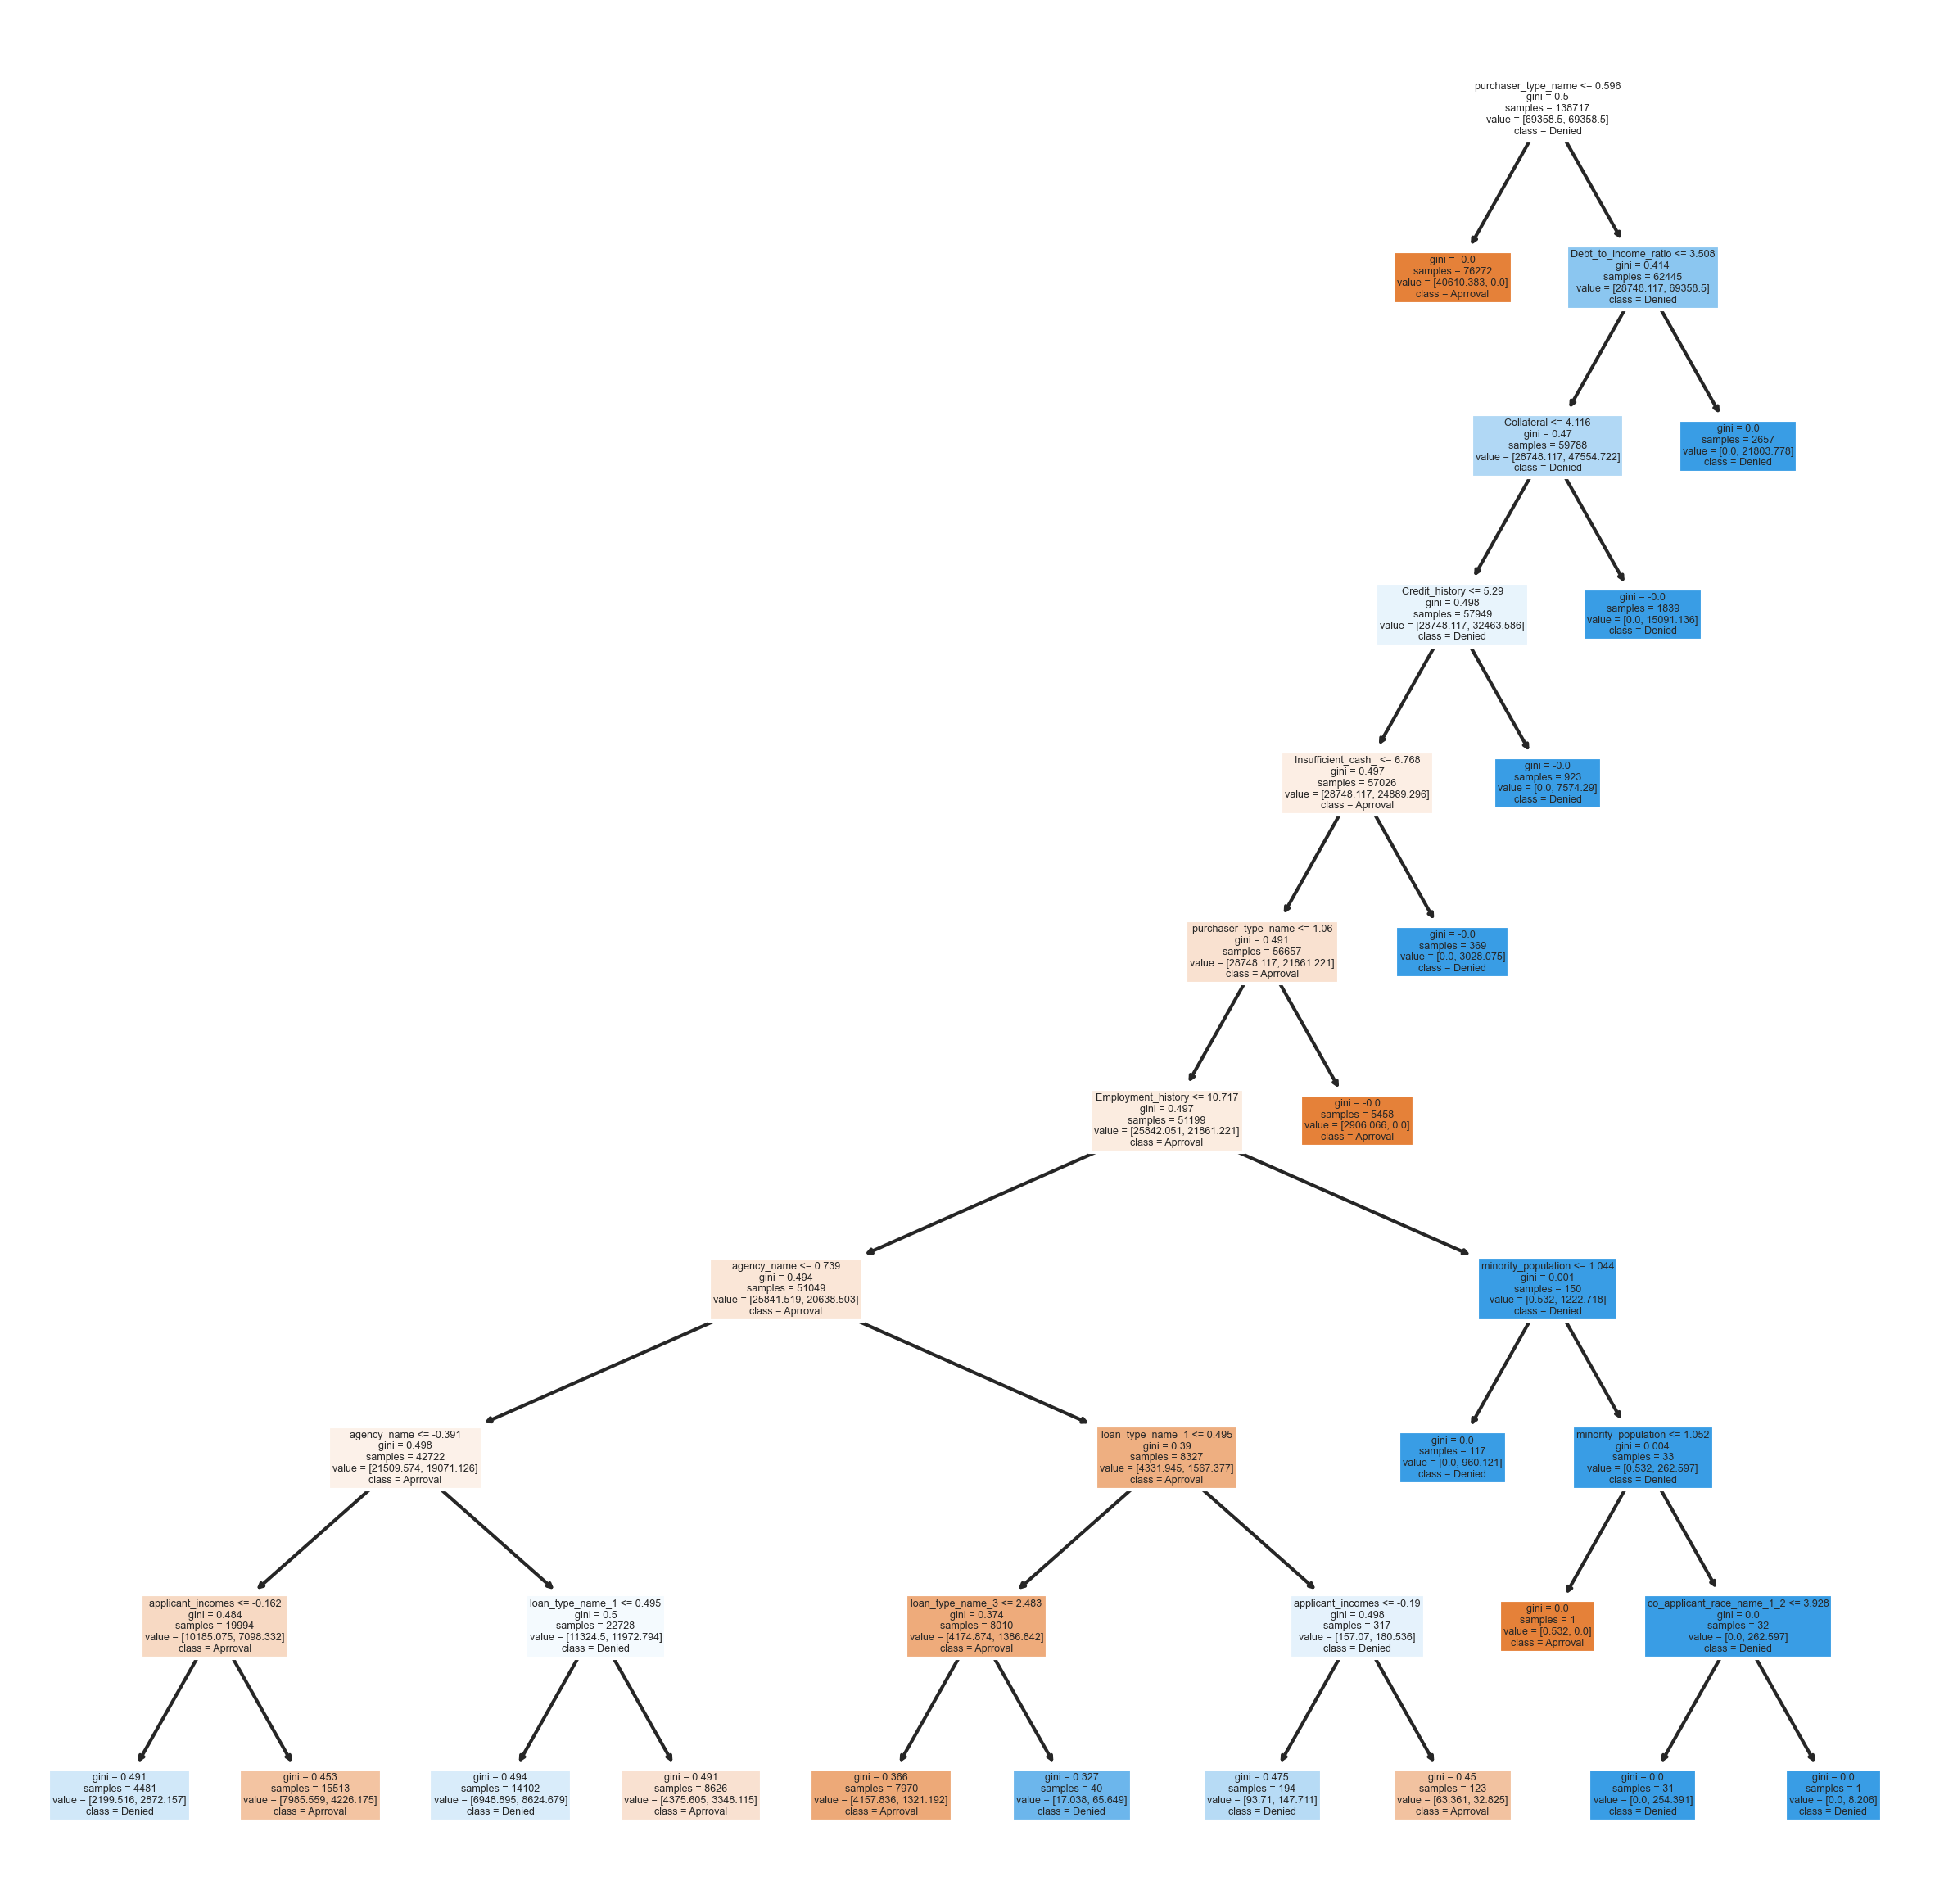

In [314]:
from sklearn import tree
fn=X.columns
cn=['Aprroval', 'Denied']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf_Decision_Tree,
               class_names= cn,
               feature_names= fn,
               filled = True);